# Popular Tracks 🎼👂🔊

Using the script from the previous notebook, I generated .csv files for the top 50 playlists for 10 different countries/markets. In this notebook, I have explored the values generated for each song in the 10 top 50 playlists. 

In [1]:
# Loading the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os

import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.tools as tls
py.init_notebook_mode(connected=True)
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot

import re
from langdetect import detect
from textblob import TextBlob

In [2]:
# Importing all the datasets 
global_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\30.03.2020\Global Top 50.csv'
usa_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\30.03.2020\United States Top 50.csv'
uk_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\30.03.2020\United Kingdom Top 50.csv'
brazil_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\30.03.2020\Brazil Top 50.csv'
germany_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\30.03.2020\Germany Top 50.csv'
spain_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\30.03.2020\Spain Top 50.csv'
mexico_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\30.03.2020\Mexico Top 50.csv'
italy_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\30.03.2020\Italy Top 50.csv'
philippines_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\30.03.2020\Philippines Top 50.csv'
netherlands_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\30.03.2020\Netherlands Top 50.csv'

pwd = os.getcwd()
os.chdir(os.path.dirname(global_path))
globalx = pd.read_csv(os.path.basename(global_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

pwd = os.getcwd()
os.chdir(os.path.dirname(usa_path))
usa = pd.read_csv(os.path.basename(usa_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

pwd = os.getcwd()
os.chdir(os.path.dirname(uk_path))
uk = pd.read_csv(os.path.basename(uk_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

pwd = os.getcwd()
os.chdir(os.path.dirname(brazil_path))
brazil = pd.read_csv(os.path.basename(brazil_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

pwd = os.getcwd()
os.chdir(os.path.dirname(germany_path))
germany = pd.read_csv(os.path.basename(germany_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

pwd = os.getcwd()
os.chdir(os.path.dirname(spain_path))
spain = pd.read_csv(os.path.basename(spain_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

pwd = os.getcwd()
os.chdir(os.path.dirname(mexico_path))
mexico = pd.read_csv(os.path.basename(mexico_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

pwd = os.getcwd()
os.chdir(os.path.dirname(italy_path))
italy = pd.read_csv(os.path.basename(italy_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

pwd = os.getcwd()
os.chdir(os.path.dirname(philippines_path))
philippines = pd.read_csv(os.path.basename(philippines_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

pwd = os.getcwd()
os.chdir(os.path.dirname(netherlands_path))
netherlands = pd.read_csv(os.path.basename(netherlands_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

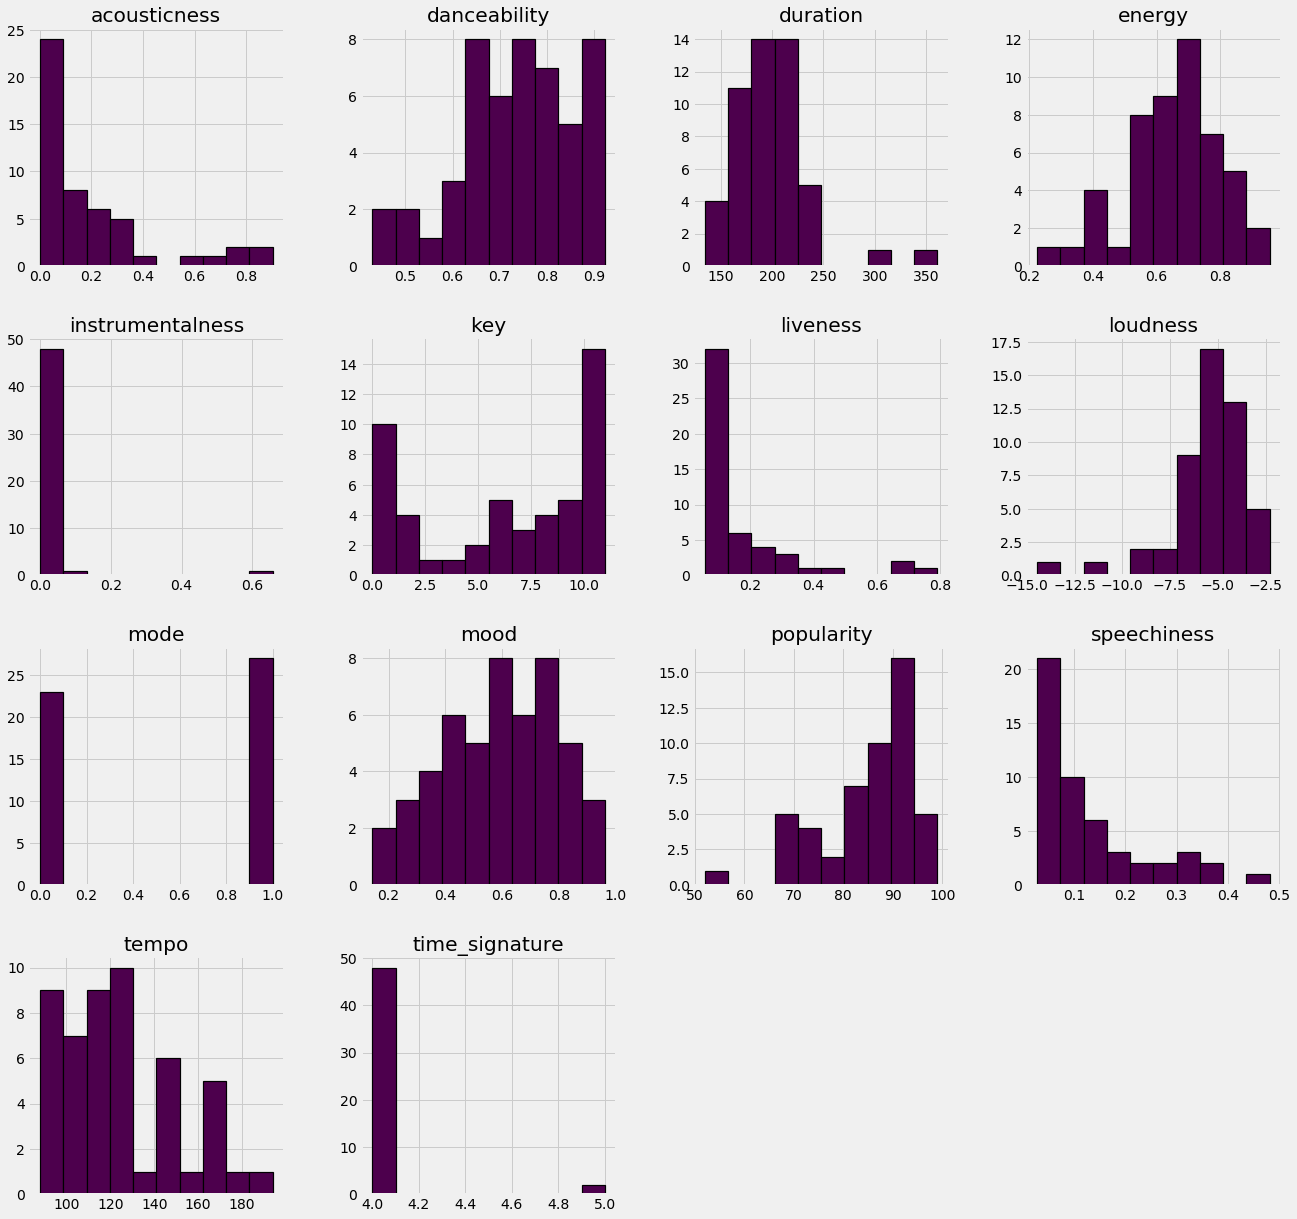

In [4]:
# Inspecting all variables for Global dataset 
plt.style.use('fivethirtyeight')
globalx.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20), color='#4d004d');

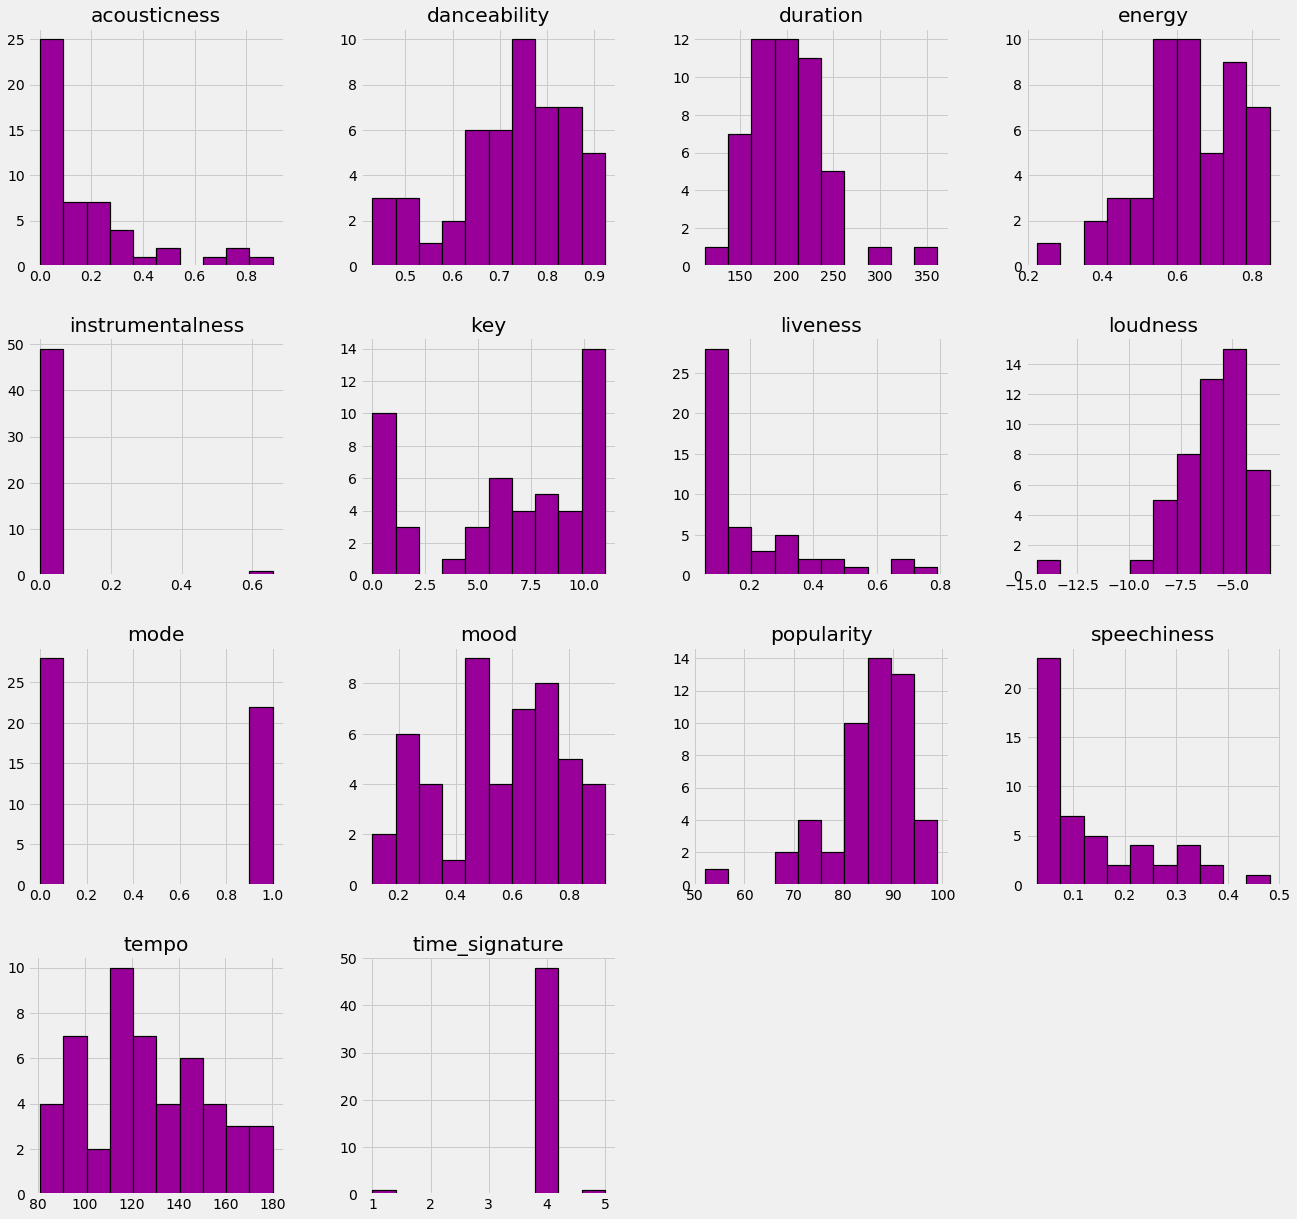

In [5]:
# Inspecting all variables for the USA 
plt.style.use('fivethirtyeight')
usa.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20), color='#990099');

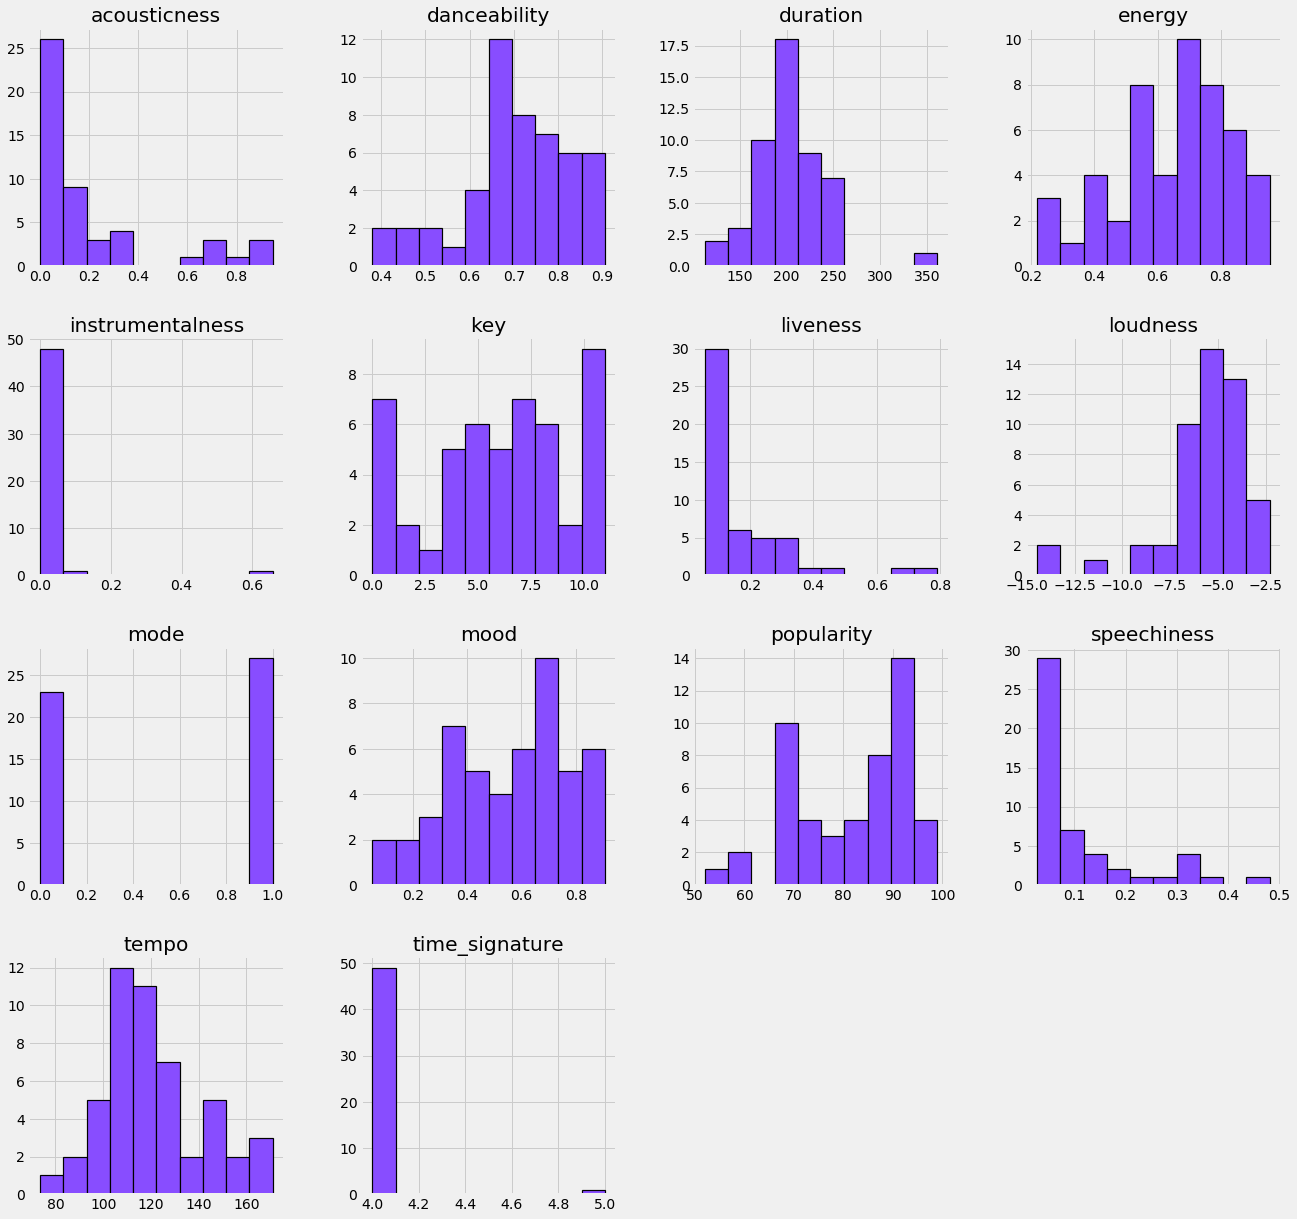

In [6]:
# Inspecting all variables for the UK
plt.style.use('fivethirtyeight')
uk.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20), color='#884dff');

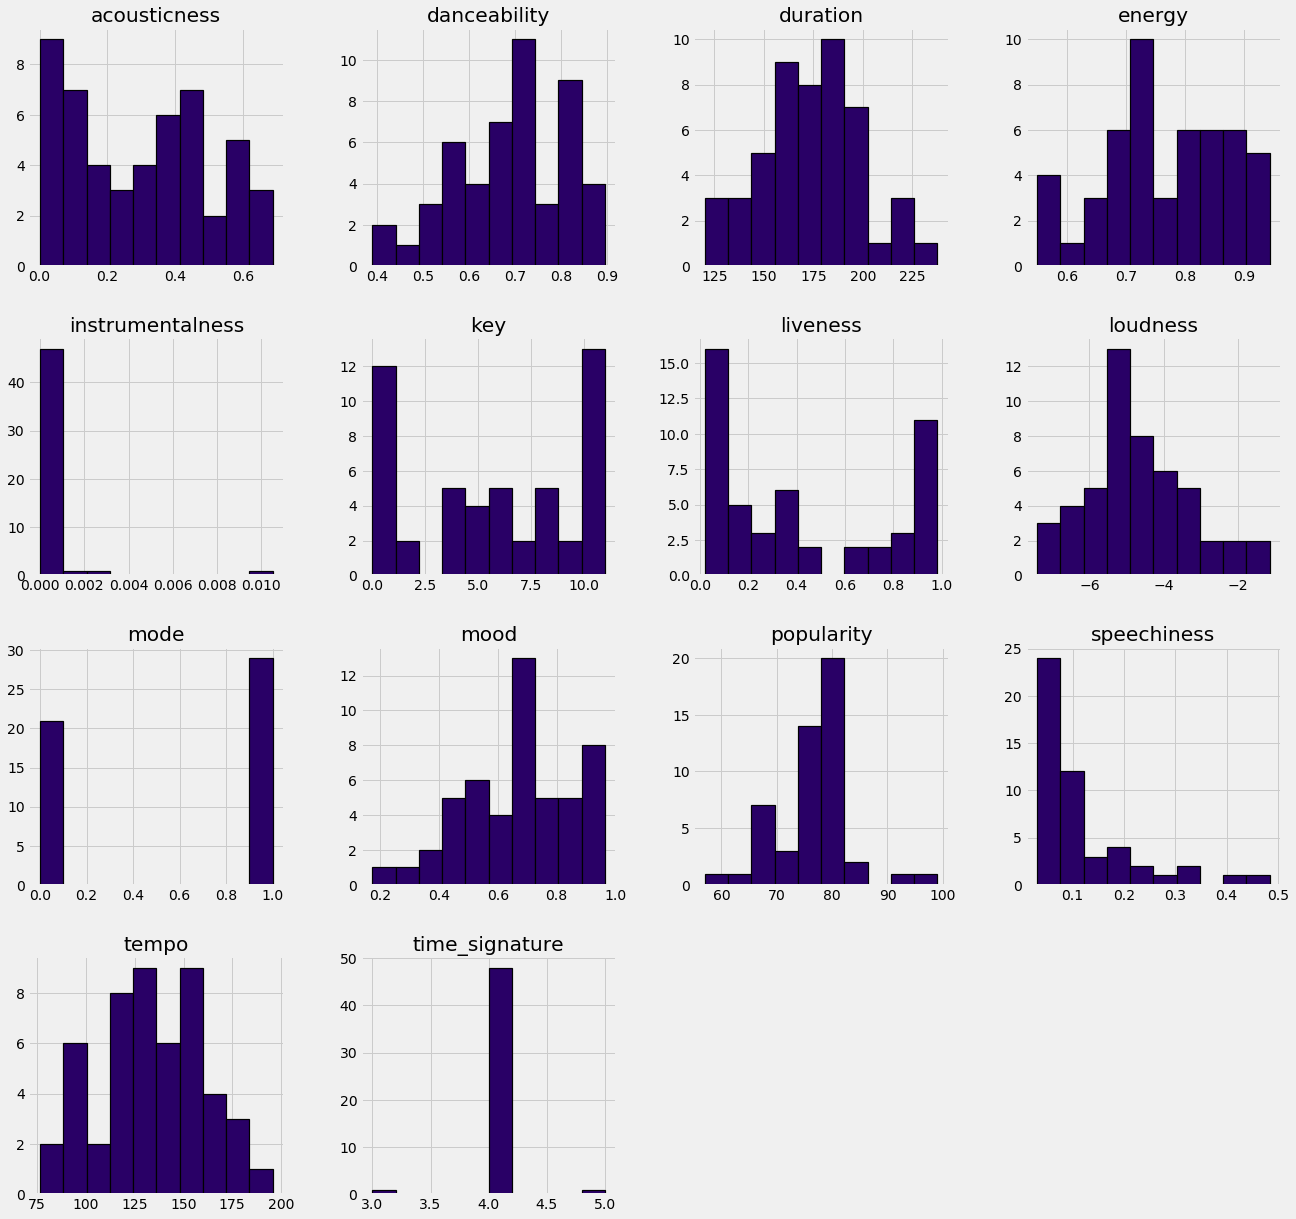

In [7]:
# Inspecting all variables for Brazil 
plt.style.use('fivethirtyeight')
brazil.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20), color='#290066');

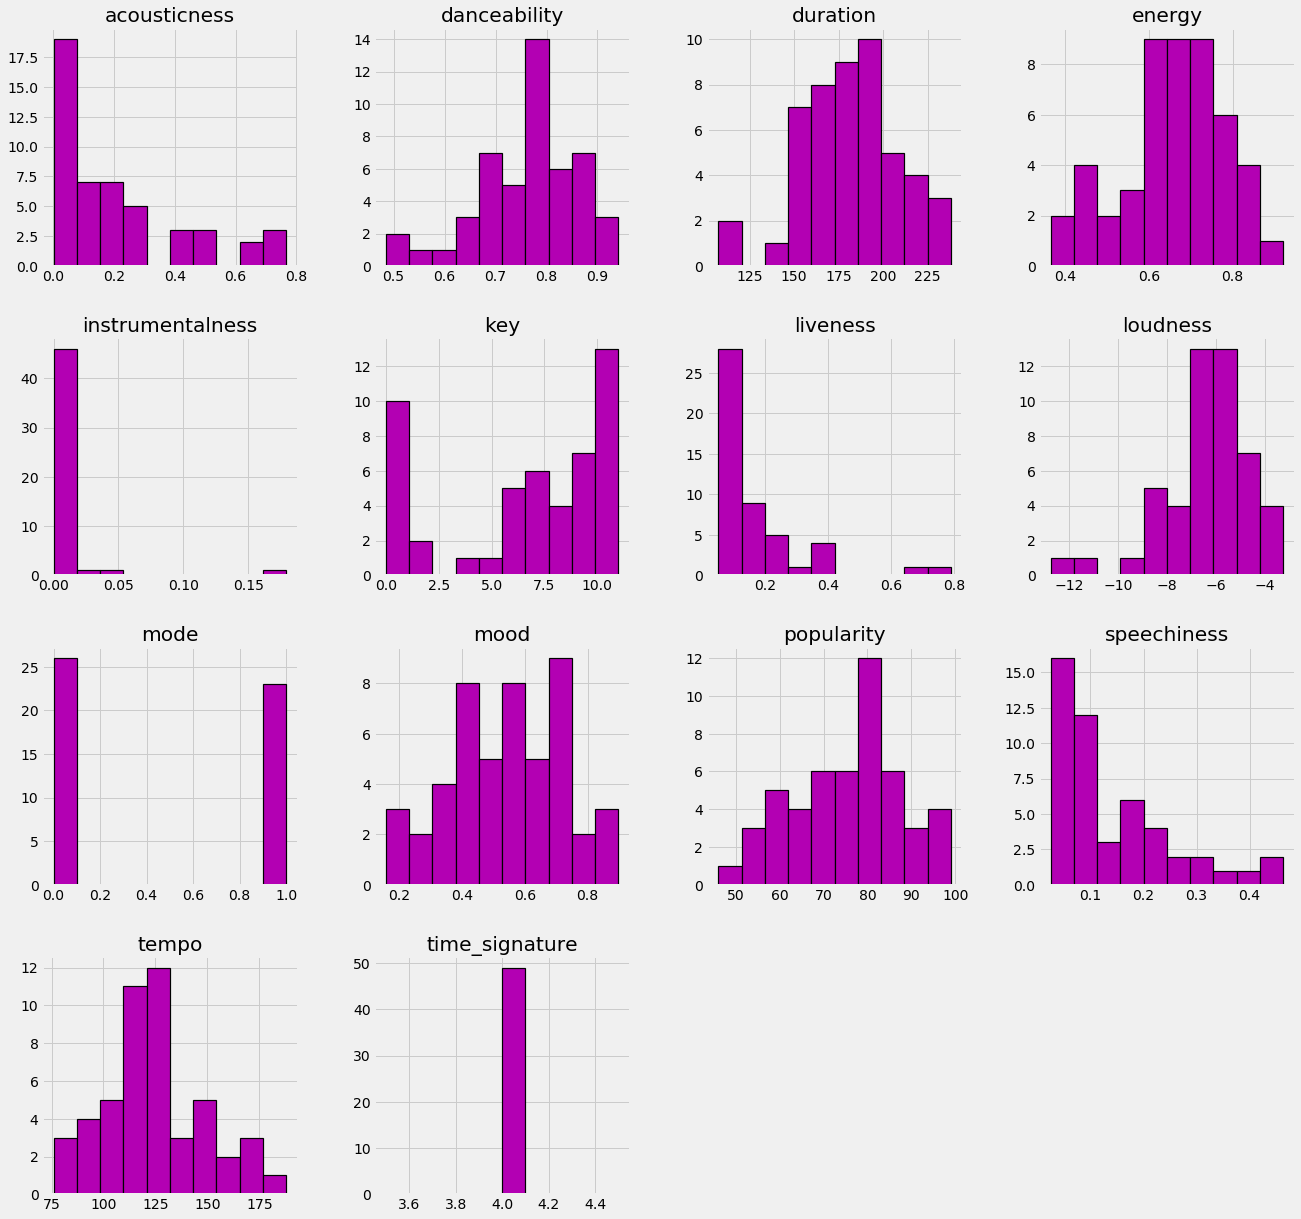

In [8]:
# Inspecting all variables for Germany 
plt.style.use('fivethirtyeight')
germany.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20), color='#b300b3');

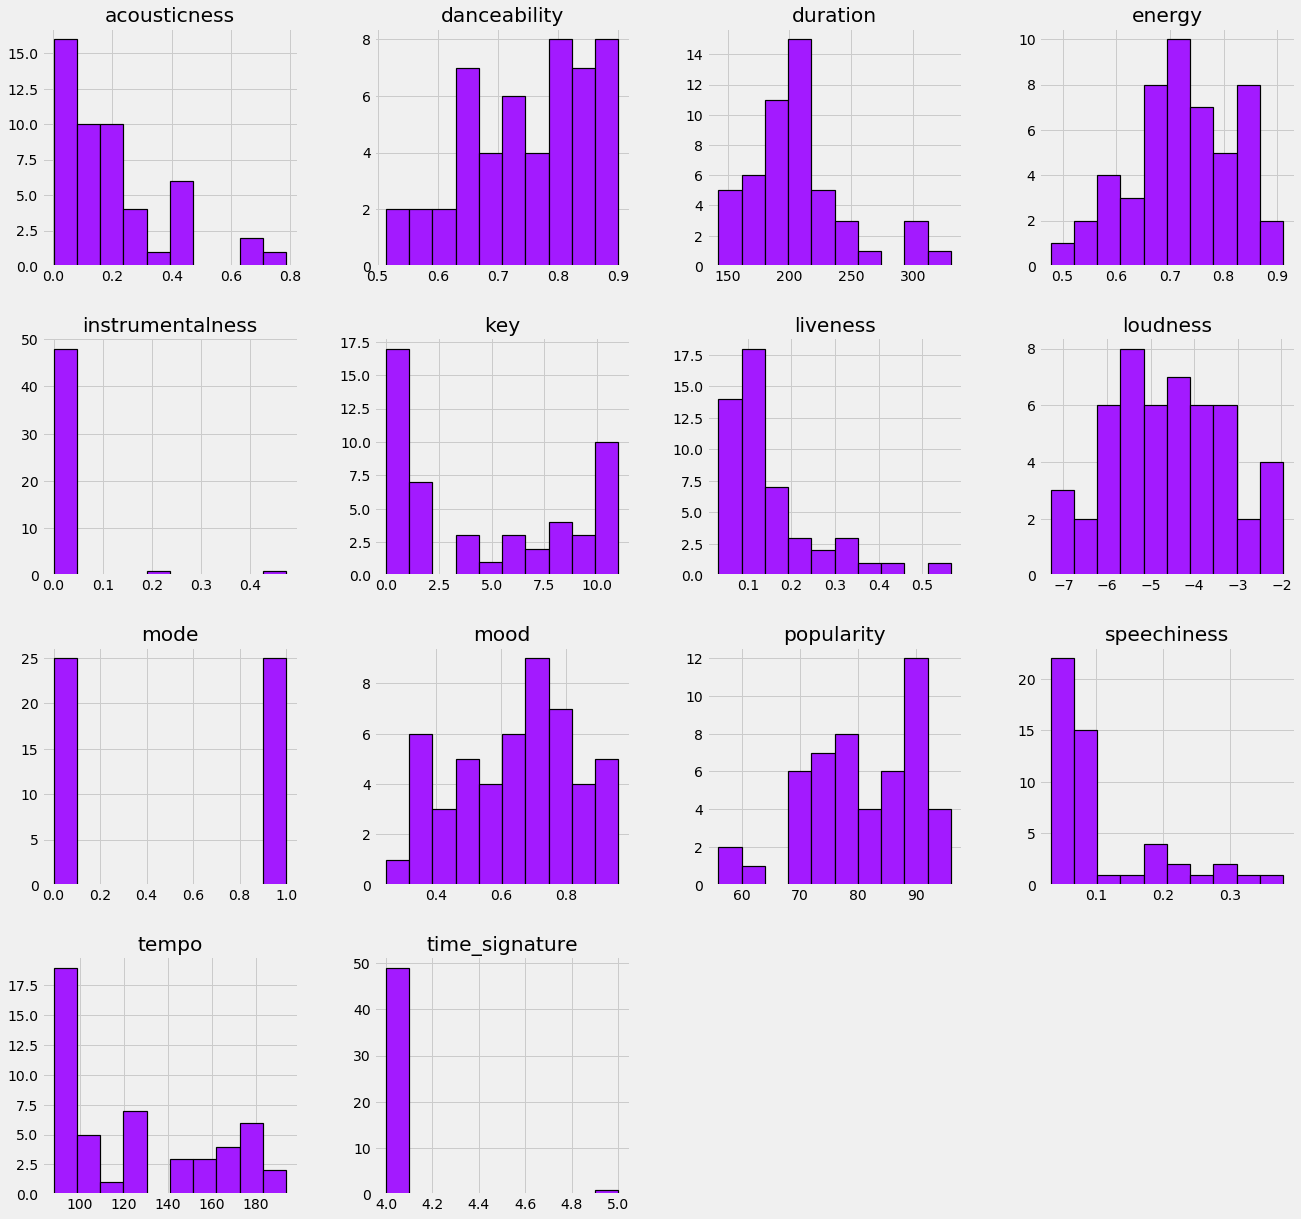

In [9]:
# Inspecting all variables for Spain
plt.style.use('fivethirtyeight')
spain.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20), color='#a31aff');

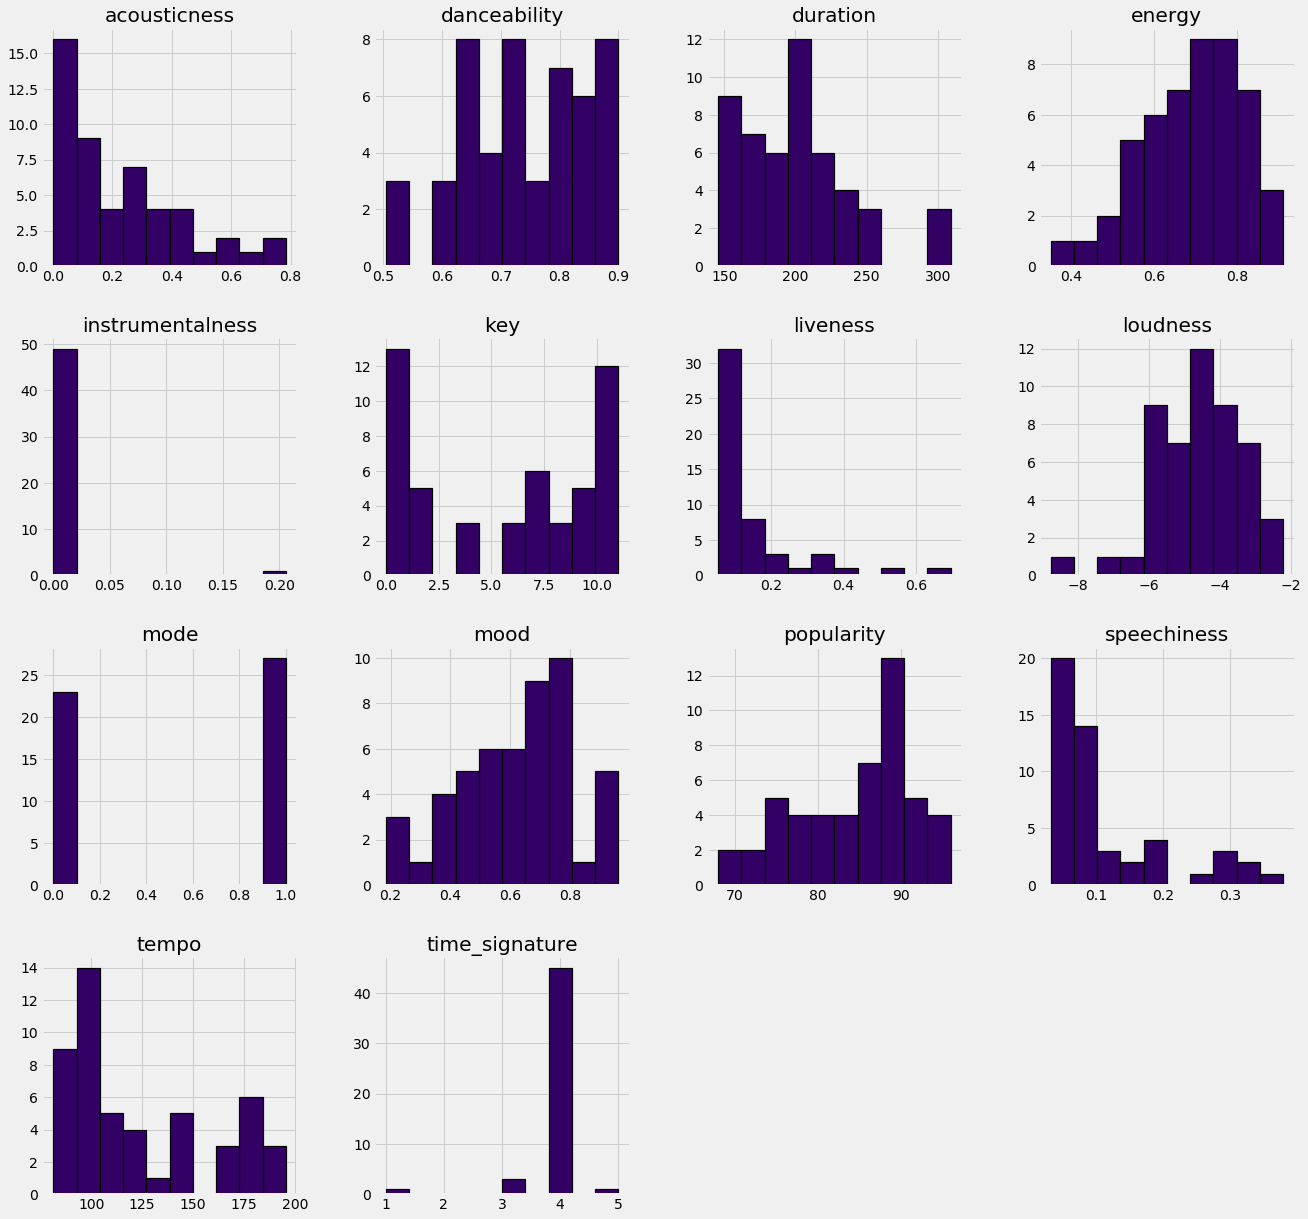

In [10]:
# Inspecting all variables for Mexico 
plt.style.use('fivethirtyeight')
mexico.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20), color='#330066');

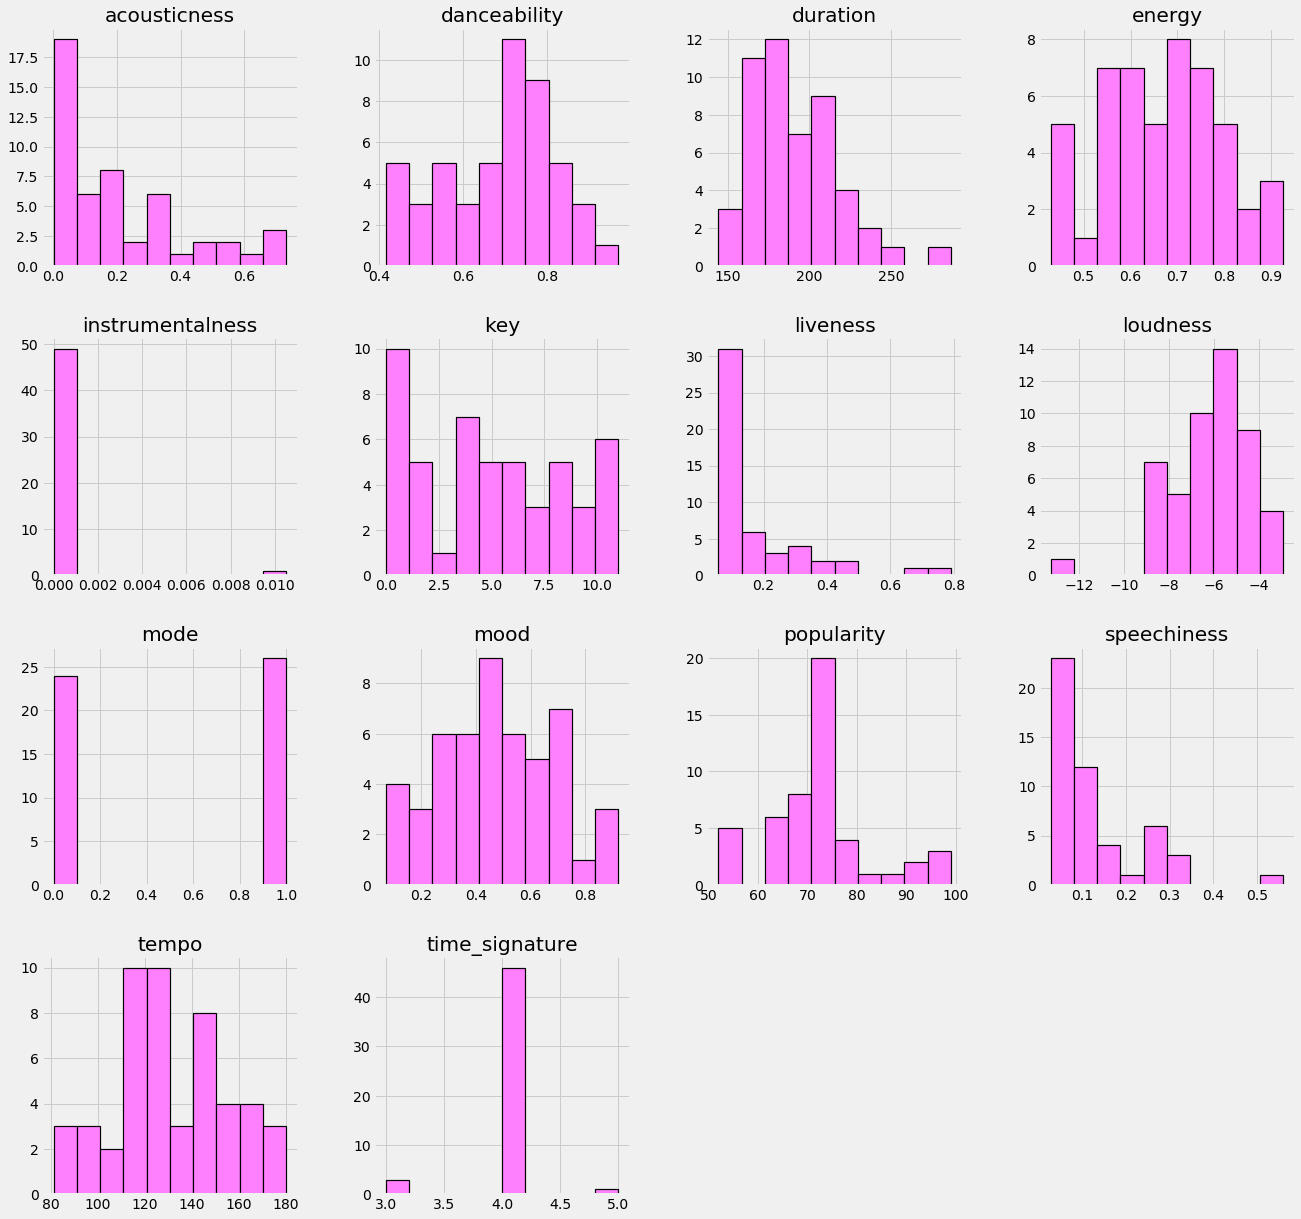

In [11]:
# Inspecting all variables for Italy 
plt.style.use('fivethirtyeight')
italy.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20), color='#ff80ff');

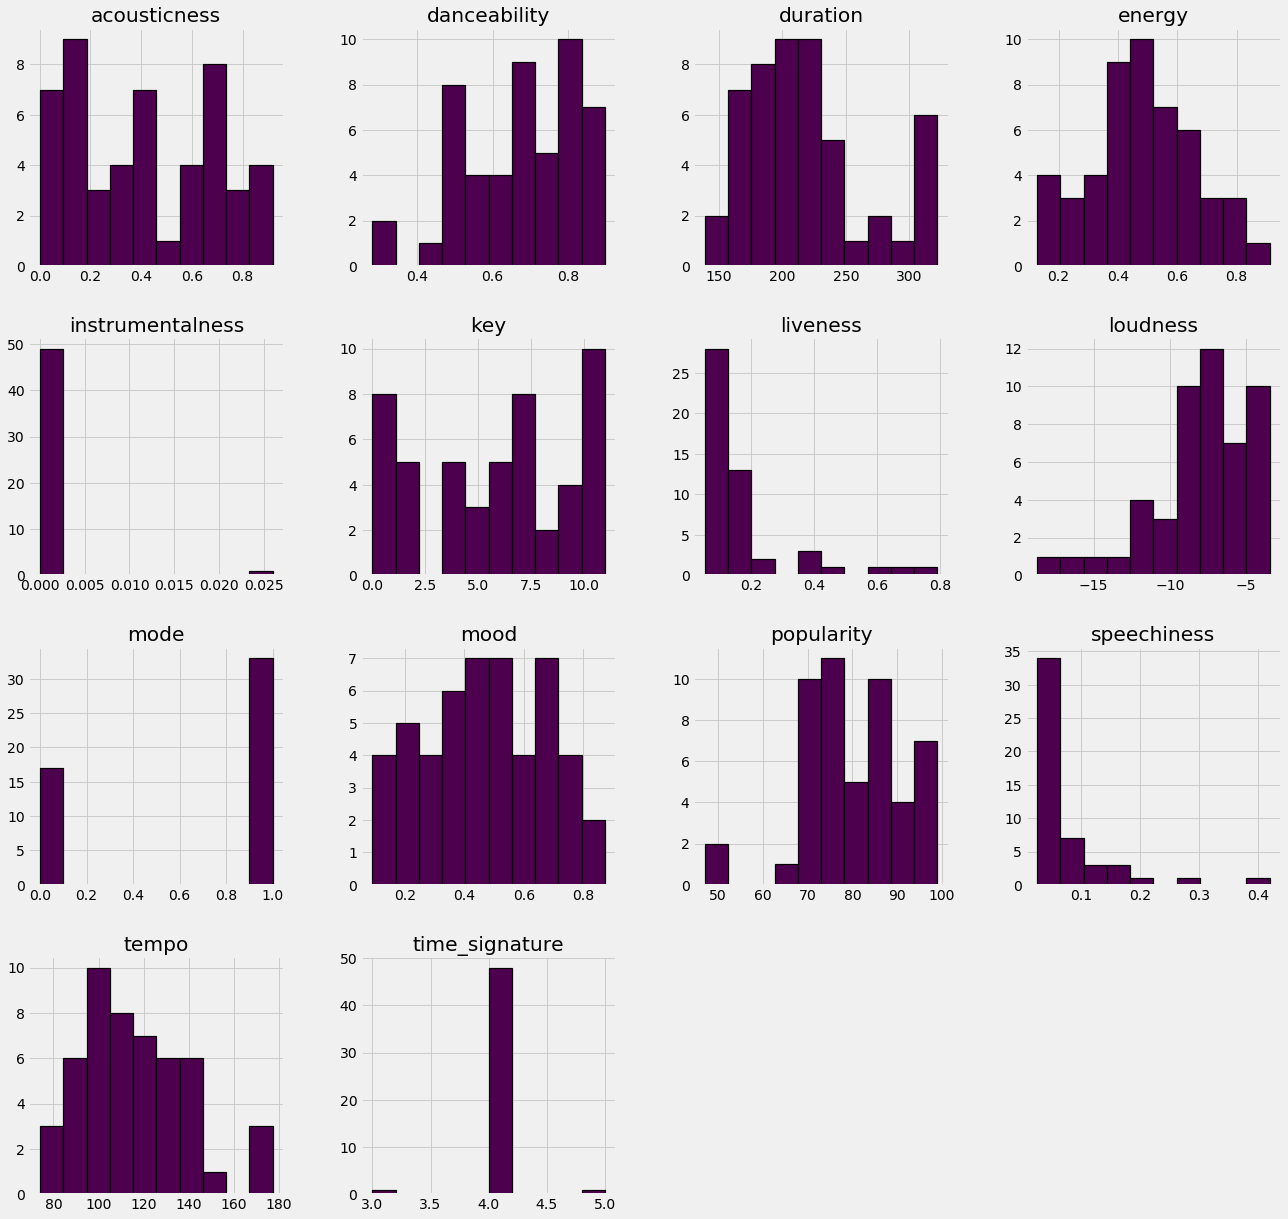

In [12]:
# Inspecting all variables for the Philippines 
plt.style.use('fivethirtyeight')
philippines.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20), color='#4d004d');

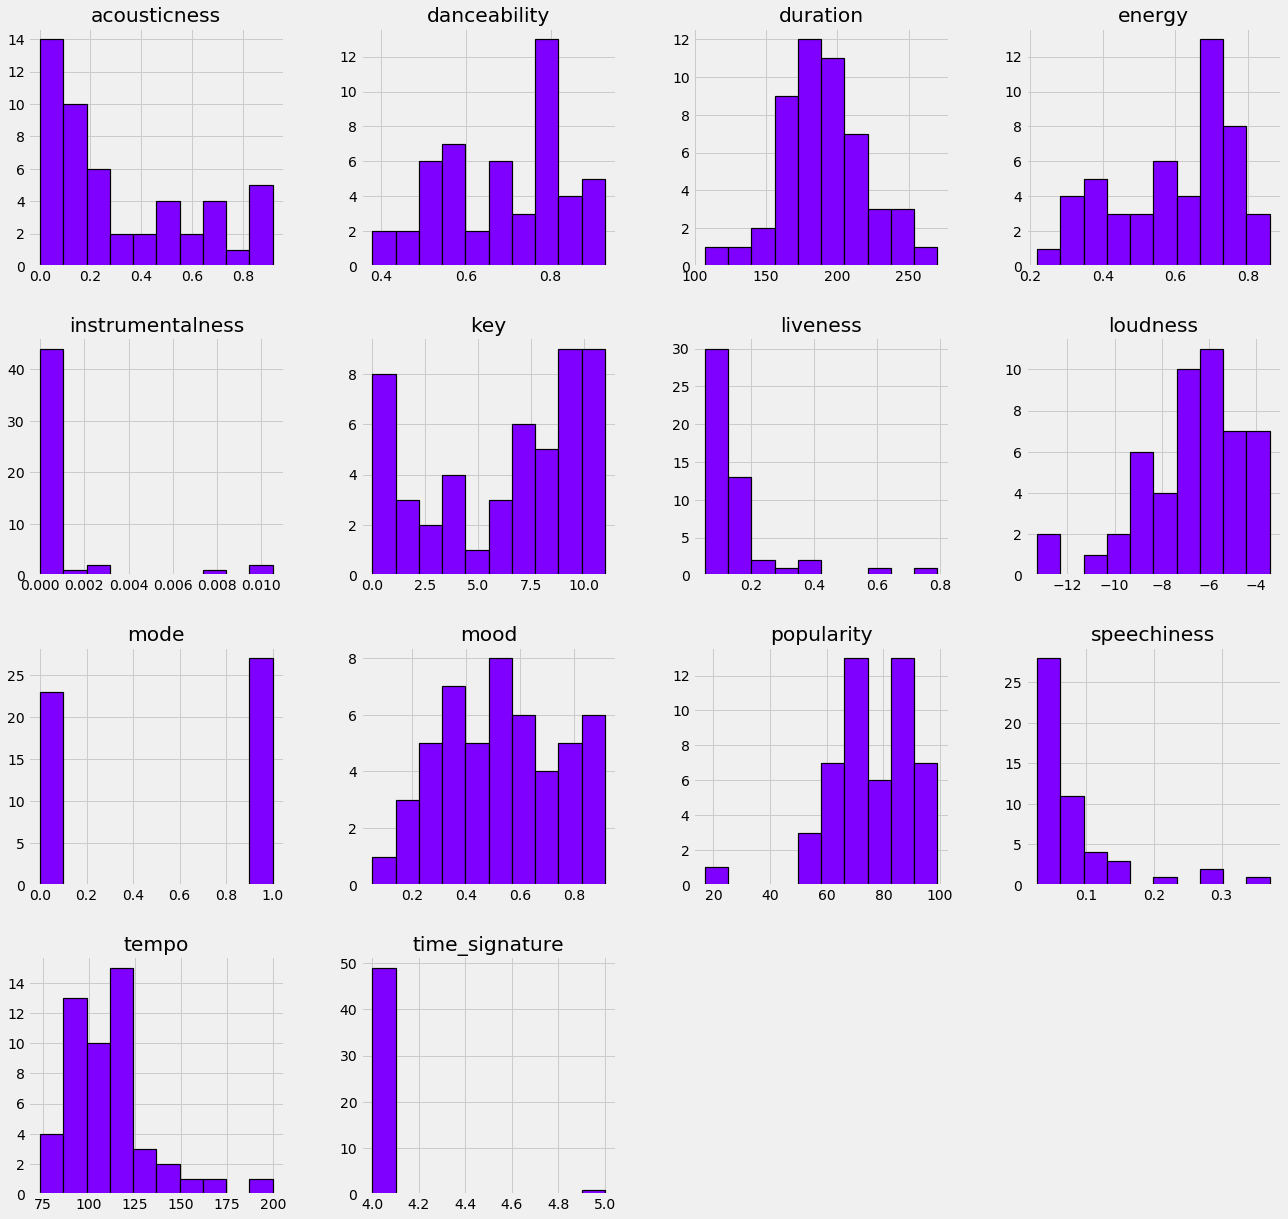

In [13]:
# Inspecting all variables for the Netherlands 
plt.style.use('fivethirtyeight')
netherlands.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20), color='#8000ff');

In [14]:
# Comparative histogram for track duration for all countries 
fig = go.Figure()

x1 = globalx['duration']
x2 = usa['duration']
x3 = uk['duration']
x4 = brazil['duration']
x5 = germany['duration']
x6 = spain['duration']
x7 = mexico['duration']
x8 = italy['duration']
x9 = philippines['duration']
x10 = netherlands['duration']

fig.add_trace(go.Histogram(x=x1, name='Global', nbinsx=25))
fig.add_trace(go.Histogram(x=x2, name='USA', nbinsx=25))
fig.add_trace(go.Histogram(x=x3, name='UK', nbinsx=25))
fig.add_trace(go.Histogram(x=x4, name='Brazil', nbinsx=25))
fig.add_trace(go.Histogram(x=x5, name='Germany', nbinsx=25))
fig.add_trace(go.Histogram(x=x6, name='Spain', nbinsx=25))
fig.add_trace(go.Histogram(x=x7, name='Mexico', nbinsx=25))
fig.add_trace(go.Histogram(x=x8, name='Italy', nbinsx=25))
fig.add_trace(go.Histogram(x=x9, name='Philippines', nbinsx=25))
fig.add_trace(go.Histogram(x=x10, name='Netherlands', nbinsx=25))

fig.update_layout(
    barmode='overlay',
    title='Track Duration',
    xaxis_nticks=80, 
    yaxis_nticks=20,
    autosize=False,
    width=900,
    height=600)

fig.update_traces(opacity=0.75)

fig.show()

In [15]:
# Comparative boxplots for track duration for all countries 
fig = go.Figure()

fig.add_trace(go.Box(x=x1, name='Global'))
fig.add_trace(go.Box(x=x2, name='USA'))
fig.add_trace(go.Box(x=x3, name='UK'))
fig.add_trace(go.Box(x=x4, name='Brazil'))
fig.add_trace(go.Box(x=x5, name='Germany'))
fig.add_trace(go.Box(x=x6, name='Spain'))
fig.add_trace(go.Box(x=x7, name='Mexico'))
fig.add_trace(go.Box(x=x8, name='Italy'))
fig.add_trace(go.Box(x=x9, name='Philippines'))
fig.add_trace(go.Box(x=x10, name='Netherlands'))

fig.update_layout(
    title='Track Duration',
    autosize=False,
    width=900,
    height=600)

fig.show()

In [16]:
# Comparative variables for danceability for all countries 
fig = go.Figure()

x1 = globalx['danceability']
x2 = usa['danceability']
x3 = uk['danceability']
x4 = brazil['danceability']
x5 = germany['danceability']
x6 = spain['danceability']
x7 = mexico['danceability']
x8 = italy['danceability']
x9 = philippines['danceability']
x10 = netherlands['danceability']

fig.add_trace(go.Histogram(x=x1, name='Global', nbinsx=25))
fig.add_trace(go.Histogram(x=x2, name='USA', nbinsx=25))
fig.add_trace(go.Histogram(x=x3, name='UK', nbinsx=25))
fig.add_trace(go.Histogram(x=x4, name='Brazil', nbinsx=25))
fig.add_trace(go.Histogram(x=x5, name='Germany', nbinsx=25))
fig.add_trace(go.Histogram(x=x6, name='Spain', nbinsx=25))
fig.add_trace(go.Histogram(x=x7, name='Mexico', nbinsx=25))
fig.add_trace(go.Histogram(x=x8, name='Italy', nbinsx=25))
fig.add_trace(go.Histogram(x=x8, name='Philippines', nbinsx=25))
fig.add_trace(go.Histogram(x=x8, name='Netherlands', nbinsx=25))

fig.update_layout(
    barmode='overlay',
    title='Danceability',
    xaxis_nticks=20, 
    yaxis_nticks=20,
    autosize=False,
    width=900,
    height=600)

fig.update_traces(opacity=0.75)

fig.show()

In [17]:
# Comparative boxplots for danceability for all countries 
fig = go.Figure()

fig.add_trace(go.Box(x=x1, name='Global'))
fig.add_trace(go.Box(x=x2, name='USA'))
fig.add_trace(go.Box(x=x3, name='UK'))
fig.add_trace(go.Box(x=x4, name='Brazil'))
fig.add_trace(go.Box(x=x5, name='Germany'))
fig.add_trace(go.Box(x=x6, name='Spain'))
fig.add_trace(go.Box(x=x7, name='Mexico'))
fig.add_trace(go.Box(x=x8, name='Italy'))
fig.add_trace(go.Box(x=x9, name='Philippines'))
fig.add_trace(go.Box(x=x10, name='Netherlands'))

fig.update_layout(
    title='Danceability',
    autosize=False,
    width=900,
    height=600)

fig.show()

In [18]:
# Comparative histograms for energy for all countries 
fig = go.Figure()

x1 = globalx['energy']
x2 = usa['energy']
x3 = uk['energy']
x4 = brazil['energy']
x5 = germany['energy']
x6 = spain['energy']
x7 = mexico['energy']
x8 = italy['energy']
x9 = philippines['energy']
x10 = netherlands['energy']

fig.add_trace(go.Histogram(x=x1, name='Global', nbinsx=25))
fig.add_trace(go.Histogram(x=x2, name='USA', nbinsx=25))
fig.add_trace(go.Histogram(x=x3, name='UK', nbinsx=25))
fig.add_trace(go.Histogram(x=x4, name='Brazil', nbinsx=25))
fig.add_trace(go.Histogram(x=x5, name='Germany', nbinsx=25))
fig.add_trace(go.Histogram(x=x6, name='Spain', nbinsx=25))
fig.add_trace(go.Histogram(x=x7, name='Mexico', nbinsx=25))
fig.add_trace(go.Histogram(x=x8, name='Italy', nbinsx=25))
fig.add_trace(go.Histogram(x=x9, name='Philippines', nbinsx=25))
fig.add_trace(go.Histogram(x=x10, name='Netherlands', nbinsx=25))

fig.update_layout(
    barmode='overlay',
    title='Energy',
    xaxis_nticks=20, 
    yaxis_nticks=20,
    autosize=False,
    width=900,
    height=600)

fig.update_traces(opacity=0.75)

fig.show()

In [19]:
# Comparative boxplots for energy for all countries 
fig = go.Figure()

fig.add_trace(go.Box(x=x1, name='Global'))
fig.add_trace(go.Box(x=x2, name='USA'))
fig.add_trace(go.Box(x=x3, name='UK'))
fig.add_trace(go.Box(x=x4, name='Brazil'))
fig.add_trace(go.Box(x=x5, name='Germany'))
fig.add_trace(go.Box(x=x6, name='Spain'))
fig.add_trace(go.Box(x=x7, name='Mexico'))
fig.add_trace(go.Box(x=x8, name='Italy'))
fig.add_trace(go.Box(x=x8, name='Philippines'))
fig.add_trace(go.Box(x=x8, name='Netherlands'))

fig.update_layout(
    title='Energy',
    autosize=False,
    width=900,
    height=600)

fig.show()

In [20]:
# Comparative histograms for key for all countries 
fig = go.Figure()

x1 = globalx['key']
x2 = usa['key']
x3 = uk['key']
x4 = brazil['key']
x5 = germany['key']
x6 = spain['key']
x7 = mexico['key']
x8 = italy['key']
x9 = philippines['key']
x10 = netherlands['key']

fig.add_trace(go.Histogram(x=x1, name='Global', nbinsx=25))
fig.add_trace(go.Histogram(x=x2, name='USA', nbinsx=25))
fig.add_trace(go.Histogram(x=x3, name='UK', nbinsx=25))
fig.add_trace(go.Histogram(x=x4, name='Brazil', nbinsx=25))
fig.add_trace(go.Histogram(x=x5, name='Germany', nbinsx=25))
fig.add_trace(go.Histogram(x=x6, name='Spain', nbinsx=25))
fig.add_trace(go.Histogram(x=x7, name='Mexico', nbinsx=25))
fig.add_trace(go.Histogram(x=x8, name='Italy', nbinsx=25))
fig.add_trace(go.Histogram(x=x8, name='Philippines', nbinsx=25))
fig.add_trace(go.Histogram(x=x8, name='Netherlands', nbinsx=25))

fig.update_layout(
    barmode='overlay',
    title='Key',
    xaxis_nticks=20, 
    yaxis_nticks=20,
    autosize=False,
    width=900,
    height=600)

fig.update_traces(opacity=0.75)

fig.show()

In [21]:
# Comparative boxplots for key for all countries 
fig = go.Figure()

fig.add_trace(go.Box(x=x1, name='Global'))
fig.add_trace(go.Box(x=x2, name='USA'))
fig.add_trace(go.Box(x=x3, name='UK'))
fig.add_trace(go.Box(x=x4, name='Brazil'))
fig.add_trace(go.Box(x=x5, name='Germany'))
fig.add_trace(go.Box(x=x6, name='Spain'))
fig.add_trace(go.Box(x=x7, name='Mexico'))
fig.add_trace(go.Box(x=x8, name='Italy'))
fig.add_trace(go.Box(x=x8, name='Philippines'))
fig.add_trace(go.Box(x=x8, name='Netherlands'))

fig.update_layout(
    title='Key',
    autosize=False,
    width=900,
    height=600)

fig.show()

In [22]:
# Comparative histogram for loudness for all countries 
fig = go.Figure()

x1 = globalx['loudness']
x2 = usa['loudness']
x3 = uk['loudness']
x4 = brazil['loudness']
x5 = germany['loudness']
x6 = spain['loudness']
x7 = mexico['loudness']
x8 = italy['loudness']
x9 = philippines['loudness']
x10 = netherlands['loudness']

fig.add_trace(go.Histogram(x=x1, name='Global', nbinsx=25))
fig.add_trace(go.Histogram(x=x2, name='USA', nbinsx=25))
fig.add_trace(go.Histogram(x=x3, name='UK', nbinsx=25))
fig.add_trace(go.Histogram(x=x4, name='Brazil', nbinsx=25))
fig.add_trace(go.Histogram(x=x5, name='Germany', nbinsx=25))
fig.add_trace(go.Histogram(x=x6, name='Spain', nbinsx=25))
fig.add_trace(go.Histogram(x=x7, name='Mexico', nbinsx=25))
fig.add_trace(go.Histogram(x=x8, name='Italy', nbinsx=25))
fig.add_trace(go.Histogram(x=x9, name='Philippines', nbinsx=25))
fig.add_trace(go.Histogram(x=x10, name='Netherlands', nbinsx=25))

fig.update_layout(
    barmode='overlay',
    title='Loudness',
    xaxis_nticks=20, 
    yaxis_nticks=20,
    autosize=False,
    width=900,
    height=600)

fig.update_traces(opacity=0.75)

fig.show()

In [23]:
# Comparative boxplots for loudness for all countries 
fig = go.Figure()

fig.add_trace(go.Box(x=x1, name='Global'))
fig.add_trace(go.Box(x=x2, name='USA'))
fig.add_trace(go.Box(x=x3, name='UK'))
fig.add_trace(go.Box(x=x4, name='Brazil'))
fig.add_trace(go.Box(x=x5, name='Germany'))
fig.add_trace(go.Box(x=x6, name='Spain'))
fig.add_trace(go.Box(x=x7, name='Mexico'))
fig.add_trace(go.Box(x=x8, name='Italy'))
fig.add_trace(go.Box(x=x9, name='Philippines'))
fig.add_trace(go.Box(x=x10, name='Netherlands'))

fig.update_layout(
    title='Loudness',
    autosize=False,
    width=900,
    height=600)

fig.show()

In [24]:
# Comparative histogram for mode for all countries 
fig = go.Figure()

x1 = globalx['mode']
x2 = usa['mode']
x3 = uk['mode']
x4 = brazil['mode']
x5 = germany['mode']
x6 = spain['mode']
x7 = mexico['mode']
x8 = italy['mode']
x9 = philippines['mode']
x10 = netherlands['mode']

fig.add_trace(go.Histogram(x=x1, name='Global', nbinsx=25))
fig.add_trace(go.Histogram(x=x2, name='USA', nbinsx=25))
fig.add_trace(go.Histogram(x=x3, name='UK', nbinsx=25))
fig.add_trace(go.Histogram(x=x4, name='Brazil', nbinsx=25))
fig.add_trace(go.Histogram(x=x5, name='Germany', nbinsx=25))
fig.add_trace(go.Histogram(x=x6, name='Spain', nbinsx=25))
fig.add_trace(go.Histogram(x=x7, name='Mexico', nbinsx=25))
fig.add_trace(go.Histogram(x=x8, name='Italy', nbinsx=25))
fig.add_trace(go.Histogram(x=x9, name='Philippines', nbinsx=25))
fig.add_trace(go.Histogram(x=x10, name='Netherlands', nbinsx=25))

fig.update_layout(
    barmode='overlay',
    title='Mode',
    xaxis_nticks=20, 
    yaxis_nticks=20,
    autosize=False,
    width=900,
    height=600)

fig.update_traces(opacity=0.75)

fig.show()

In [25]:
# Comparative boxplots for mode for all countries 
fig = go.Figure()

fig.add_trace(go.Box(x=x1, name='Global'))
fig.add_trace(go.Box(x=x2, name='USA'))
fig.add_trace(go.Box(x=x3, name='UK'))
fig.add_trace(go.Box(x=x4, name='Brazil'))
fig.add_trace(go.Box(x=x5, name='Germany'))
fig.add_trace(go.Box(x=x6, name='Spain'))
fig.add_trace(go.Box(x=x7, name='Mexico'))
fig.add_trace(go.Box(x=x8, name='Italy'))
fig.add_trace(go.Box(x=x9, name='Philippines'))
fig.add_trace(go.Box(x=x10, name='Netherlands'))

fig.update_layout(
    title='Mode',
    autosize=False,
    width=900,
    height=600)

fig.show()

In [26]:
# Comparative histograms for speechiness for all countries 
fig = go.Figure()

x1 = globalx['speechiness']
x2 = usa['speechiness']
x3 = uk['speechiness']
x4 = brazil['speechiness']
x5 = germany['speechiness']
x6 = spain['speechiness']
x7 = mexico['speechiness']
x8 = italy['speechiness']
x9 = philippines['speechiness']
x10 = netherlands['speechiness']

fig.add_trace(go.Histogram(x=x1, name='Global', nbinsx=25))
fig.add_trace(go.Histogram(x=x2, name='USA', nbinsx=25))
fig.add_trace(go.Histogram(x=x3, name='UK', nbinsx=25))
fig.add_trace(go.Histogram(x=x4, name='Brazil', nbinsx=25))
fig.add_trace(go.Histogram(x=x5, name='Germany', nbinsx=25))
fig.add_trace(go.Histogram(x=x6, name='Spain', nbinsx=25))
fig.add_trace(go.Histogram(x=x7, name='Mexico', nbinsx=25))
fig.add_trace(go.Histogram(x=x8, name='Italy', nbinsx=25))
fig.add_trace(go.Histogram(x=x9, name='Philippines', nbinsx=25))
fig.add_trace(go.Histogram(x=x10, name='Netherlands', nbinsx=25))

fig.update_layout(
    barmode='overlay',
    title='Speechiness',
    xaxis_nticks=20, 
    yaxis_nticks=20,
    autosize=False,
    width=900,
    height=600)

fig.update_traces(opacity=0.75)

fig.show()

In [27]:
# Comparative boxplots for speechiness for all countries 
fig = go.Figure()

fig.add_trace(go.Box(x=x1, name='Global'))
fig.add_trace(go.Box(x=x2, name='USA'))
fig.add_trace(go.Box(x=x3, name='UK'))
fig.add_trace(go.Box(x=x4, name='Brazil'))
fig.add_trace(go.Box(x=x5, name='Germany'))
fig.add_trace(go.Box(x=x6, name='Spain'))
fig.add_trace(go.Box(x=x7, name='Mexico'))
fig.add_trace(go.Box(x=x8, name='Italy'))
fig.add_trace(go.Box(x=x9, name='Philippines'))
fig.add_trace(go.Box(x=x10, name='Netherlands'))

fig.update_layout(
    title='Speechiness',
    autosize=False,
    width=900,
    height=600)

fig.show()

In [28]:
# Comparative histograms for acousticness for all countries 
fig = go.Figure()

x1 = globalx['acousticness']
x2 = usa['acousticness']
x3 = uk['acousticness']
x4 = brazil['acousticness']
x5 = germany['acousticness']
x6 = spain['acousticness']
x7 = mexico['acousticness']
x8 = italy['acousticness']
x9 = philippines['acousticness']
x10 = netherlands['acousticness']

fig.add_trace(go.Histogram(x=x1, name='Global', nbinsx=25))
fig.add_trace(go.Histogram(x=x2, name='USA', nbinsx=25))
fig.add_trace(go.Histogram(x=x3, name='UK', nbinsx=25))
fig.add_trace(go.Histogram(x=x4, name='Brazil', nbinsx=25))
fig.add_trace(go.Histogram(x=x5, name='Germany', nbinsx=25))
fig.add_trace(go.Histogram(x=x6, name='Spain', nbinsx=25))
fig.add_trace(go.Histogram(x=x7, name='Mexico', nbinsx=25))
fig.add_trace(go.Histogram(x=x8, name='Italy', nbinsx=25))
fig.add_trace(go.Histogram(x=x8, name='Philippines', nbinsx=25))
fig.add_trace(go.Histogram(x=x8, name='Netherlands', nbinsx=25))

fig.update_layout(
    barmode='overlay',
    title='Acousticness',
    xaxis_nticks=20, 
    yaxis_nticks=20,
    autosize=False,
    width=900,
    height=600)

fig.update_traces(opacity=0.75)

fig.show()

In [29]:
# Comparative boxplots for acousticness for all countries 
fig = go.Figure()

fig.add_trace(go.Box(x=x1, name='Global'))
fig.add_trace(go.Box(x=x2, name='USA'))
fig.add_trace(go.Box(x=x3, name='UK'))
fig.add_trace(go.Box(x=x4, name='Brazil'))
fig.add_trace(go.Box(x=x5, name='Germany'))
fig.add_trace(go.Box(x=x6, name='Spain'))
fig.add_trace(go.Box(x=x7, name='Mexico'))
fig.add_trace(go.Box(x=x8, name='Italy'))
fig.add_trace(go.Box(x=x9, name='Philippines'))
fig.add_trace(go.Box(x=x10, name='Netherlands'))

fig.update_layout(
    title='Acousticness',
    autosize=False,
    width=900,
    height=600)

fig.show()

In [30]:
# Comparative histograms for instrumentalness for all countries 
fig = go.Figure()

x1 = globalx['instrumentalness']
x2 = usa['instrumentalness']
x3 = uk['instrumentalness']
x4 = brazil['instrumentalness']
x5 = germany['instrumentalness']
x6 = spain['instrumentalness']
x7 = mexico['instrumentalness']
x8 = italy['instrumentalness']
x9 = philippines['instrumentalness']
x10 = netherlands['instrumentalness']

fig.add_trace(go.Histogram(x=x1, name='Global', nbinsx=25))
fig.add_trace(go.Histogram(x=x2, name='USA', nbinsx=25))
fig.add_trace(go.Histogram(x=x3, name='UK', nbinsx=25))
fig.add_trace(go.Histogram(x=x4, name='Brazil', nbinsx=25))
fig.add_trace(go.Histogram(x=x5, name='Germany', nbinsx=25))
fig.add_trace(go.Histogram(x=x6, name='Spain', nbinsx=25))
fig.add_trace(go.Histogram(x=x7, name='Mexico', nbinsx=25))
fig.add_trace(go.Histogram(x=x8, name='Italy', nbinsx=25))
fig.add_trace(go.Histogram(x=x9, name='Philippines', nbinsx=25))
fig.add_trace(go.Histogram(x=x10, name='Netherlands', nbinsx=25))

fig.update_layout(
    barmode='overlay',
    title='Instrumentalness',
    xaxis_nticks=20, 
    yaxis_nticks=20,
    autosize=False,
    width=900,
    height=600)

fig.update_traces(opacity=0.75)

fig.show()

In [31]:
# Comparative boxplots for instrumentalness for all countries 
fig = go.Figure()

fig.add_trace(go.Box(x=x1, name='Global'))
fig.add_trace(go.Box(x=x2, name='USA'))
fig.add_trace(go.Box(x=x3, name='UK'))
fig.add_trace(go.Box(x=x4, name='Brazil'))
fig.add_trace(go.Box(x=x5, name='Germany'))
fig.add_trace(go.Box(x=x6, name='Spain'))
fig.add_trace(go.Box(x=x7, name='Mexico'))
fig.add_trace(go.Box(x=x8, name='Italy'))
fig.add_trace(go.Box(x=x9, name='Philippines'))
fig.add_trace(go.Box(x=x10, name='Netherlands'))

fig.update_layout(
    title='Instrumentalness',
    autosize=False,
    width=900,
    height=600)

fig.show()

In [32]:
# Comparative histograms for liveness for all countries 
fig = go.Figure()

x1 = globalx['liveness']
x2 = usa['liveness']
x3 = uk['liveness']
x4 = brazil['liveness']
x5 = germany['liveness']
x6 = spain['liveness']
x7 = mexico['liveness']
x8 = italy['liveness']
x9 = philippines['liveness']
x10 = netherlands['liveness']

fig.add_trace(go.Histogram(x=x1, name='Global', nbinsx=25))
fig.add_trace(go.Histogram(x=x2, name='USA', nbinsx=25))
fig.add_trace(go.Histogram(x=x3, name='UK', nbinsx=25))
fig.add_trace(go.Histogram(x=x4, name='Brazil', nbinsx=25))
fig.add_trace(go.Histogram(x=x5, name='Germany', nbinsx=25))
fig.add_trace(go.Histogram(x=x6, name='Spain', nbinsx=25))
fig.add_trace(go.Histogram(x=x7, name='Mexico', nbinsx=25))
fig.add_trace(go.Histogram(x=x8, name='Italy', nbinsx=25))
fig.add_trace(go.Histogram(x=x9, name='Philippines', nbinsx=25))
fig.add_trace(go.Histogram(x=x10, name='Netherlands', nbinsx=25))

fig.update_layout(
    barmode='overlay',
    title='Liveness',
    xaxis_nticks=20, 
    yaxis_nticks=20,
    autosize=False,
    width=900,
    height=600)

fig.update_traces(opacity=0.75)

fig.show()

In [33]:
# Comparative boxplots for liveness for all countries
fig = go.Figure()

fig.add_trace(go.Box(x=x1, name='Global'))
fig.add_trace(go.Box(x=x2, name='USA'))
fig.add_trace(go.Box(x=x3, name='UK'))
fig.add_trace(go.Box(x=x4, name='Brazil'))
fig.add_trace(go.Box(x=x5, name='Germany'))
fig.add_trace(go.Box(x=x6, name='Spain'))
fig.add_trace(go.Box(x=x7, name='Mexico'))
fig.add_trace(go.Box(x=x8, name='Italy'))
fig.add_trace(go.Box(x=x9, name='Philippines'))
fig.add_trace(go.Box(x=x10, name='Netherlands'))

fig.update_layout(
    title='Liveness',
    autosize=False,
    width=900,
    height=600)

fig.show()

In [34]:
# Comparative histograms for mood for all countries 
fig = go.Figure()

x1 = globalx['mood']
x2 = usa['mood']
x3 = uk['mood']
x4 = brazil['mood']
x5 = germany['mood']
x6 = spain['mood']
x7 = mexico['mood']
x8 = italy['mood']
x9 = philippines['mood']
x10 = netherlands['mood']

fig.add_trace(go.Histogram(x=x1, name='Global', nbinsx=25))
fig.add_trace(go.Histogram(x=x2, name='USA', nbinsx=25))
fig.add_trace(go.Histogram(x=x3, name='UK', nbinsx=25))
fig.add_trace(go.Histogram(x=x4, name='Brazil', nbinsx=25))
fig.add_trace(go.Histogram(x=x5, name='Germany', nbinsx=25))
fig.add_trace(go.Histogram(x=x6, name='Spain', nbinsx=25))
fig.add_trace(go.Histogram(x=x7, name='Mexico', nbinsx=25))
fig.add_trace(go.Histogram(x=x8, name='Italy', nbinsx=25))
fig.add_trace(go.Histogram(x=x9, name='Philippines', nbinsx=25))
fig.add_trace(go.Histogram(x=x10, name='Netherlands', nbinsx=25))

fig.update_layout(
    barmode='overlay',
    title='Mood',
    xaxis_nticks=20, 
    yaxis_nticks=20,
    autosize=False,
    width=900,
    height=600)

fig.update_traces(opacity=0.75)

fig.show()

In [35]:
# Comparative boxplots for mood for all countries 
fig = go.Figure()

fig.add_trace(go.Box(x=x1, name='Global'))
fig.add_trace(go.Box(x=x2, name='USA'))
fig.add_trace(go.Box(x=x3, name='UK'))
fig.add_trace(go.Box(x=x4, name='Brazil'))
fig.add_trace(go.Box(x=x5, name='Germany'))
fig.add_trace(go.Box(x=x6, name='Spain'))
fig.add_trace(go.Box(x=x7, name='Mexico'))
fig.add_trace(go.Box(x=x8, name='Italy'))
fig.add_trace(go.Box(x=x9, name='Philippines'))
fig.add_trace(go.Box(x=x10, name='Netherlands'))

fig.update_layout(
    title='Mood',
    autosize=False,
    width=900,
    height=600)

fig.show()

In [36]:
# Comparative histograms for tempo for all countries 
fig = go.Figure()

x1 = globalx['tempo']
x2 = usa['tempo']
x3 = uk['tempo']
x4 = brazil['tempo']
x5 = germany['tempo']
x6 = spain['tempo']
x7 = mexico['tempo']
x8 = italy['tempo']
x9 = philippines['tempo']
x10 = netherlands['tempo']

fig.add_trace(go.Histogram(x=x1, name='Global', nbinsx=25))
fig.add_trace(go.Histogram(x=x2, name='USA', nbinsx=25))
fig.add_trace(go.Histogram(x=x3, name='UK', nbinsx=25))
fig.add_trace(go.Histogram(x=x4, name='Brazil', nbinsx=25))
fig.add_trace(go.Histogram(x=x5, name='Germany', nbinsx=25))
fig.add_trace(go.Histogram(x=x6, name='Spain', nbinsx=25))
fig.add_trace(go.Histogram(x=x7, name='Mexico', nbinsx=25))
fig.add_trace(go.Histogram(x=x8, name='Italy', nbinsx=25))
fig.add_trace(go.Histogram(x=x9, name='Philippines', nbinsx=25))
fig.add_trace(go.Histogram(x=x10, name='Netherlands', nbinsx=25))

fig.update_layout(
    barmode='overlay',
    title='Tempo',
    xaxis_nticks=20, 
    yaxis_nticks=20,
    autosize=False,
    width=900,
    height=600)

fig.update_traces(opacity=0.75)

fig.show()

In [37]:
# Comparative boxplots for tempo for all countries 
fig = go.Figure()

fig.add_trace(go.Box(x=x1, name='Global'))
fig.add_trace(go.Box(x=x2, name='USA'))
fig.add_trace(go.Box(x=x3, name='UK'))
fig.add_trace(go.Box(x=x4, name='Brazil'))
fig.add_trace(go.Box(x=x5, name='Germany'))
fig.add_trace(go.Box(x=x6, name='Spain'))
fig.add_trace(go.Box(x=x7, name='Mexico'))
fig.add_trace(go.Box(x=x8, name='Italy'))
fig.add_trace(go.Box(x=x9, name='Philippines'))
fig.add_trace(go.Box(x=x10, name='Netherlands'))

fig.update_layout(
    title='Tempo',
    autosize=False,
    width=900,
    height=600)

fig.show()

In [38]:
# Comparative histograms for time signature for all countries 
fig = go.Figure()

x1 = globalx['time_signature']
x2 = usa['time_signature']
x3 = uk['time_signature']
x4 = brazil['time_signature']
x5 = germany['time_signature']
x6 = spain['time_signature']
x7 = mexico['time_signature']
x8 = italy['time_signature']
x9 = philippines['time_signature']
x10 = netherlands['time_signature']

fig.add_trace(go.Histogram(x=x1, name='Global', nbinsx=25))
fig.add_trace(go.Histogram(x=x2, name='USA', nbinsx=25))
fig.add_trace(go.Histogram(x=x3, name='UK', nbinsx=25))
fig.add_trace(go.Histogram(x=x4, name='Brazil', nbinsx=25))
fig.add_trace(go.Histogram(x=x5, name='Germany', nbinsx=25))
fig.add_trace(go.Histogram(x=x6, name='Spain', nbinsx=25))
fig.add_trace(go.Histogram(x=x7, name='Mexico', nbinsx=25))
fig.add_trace(go.Histogram(x=x8, name='Italy', nbinsx=25))
fig.add_trace(go.Histogram(x=x9, name='Philippines', nbinsx=25))
fig.add_trace(go.Histogram(x=x10, name='Netherlands', nbinsx=25))

fig.update_layout(
    barmode='overlay',
    title='Time Signature',
    xaxis_nticks=20, 
    yaxis_nticks=20,
    autosize=False,
    width=900,
    height=600)

fig.update_traces(opacity=0.75)

fig.show()

In [39]:
# Comparative boxplots for time signature for all countries 
fig = go.Figure()

fig.add_trace(go.Box(x=x1, name='Global'))
fig.add_trace(go.Box(x=x2, name='USA'))
fig.add_trace(go.Box(x=x3, name='UK'))
fig.add_trace(go.Box(x=x4, name='Brazil'))
fig.add_trace(go.Box(x=x5, name='Germany'))
fig.add_trace(go.Box(x=x6, name='Spain'))
fig.add_trace(go.Box(x=x7, name='Mexico'))
fig.add_trace(go.Box(x=x8, name='Italy'))
fig.add_trace(go.Box(x=x9, name='Philippines'))
fig.add_trace(go.Box(x=x10, name='Netherlands'))

fig.update_layout(
    title='Time Signature',
    autosize=False,
    width=900,
    height=600)

fig.show()

In [40]:
# Comparative histograms for popularity for all countries 
fig = go.Figure()

x1 = globalx['popularity']
x2 = usa['popularity']
x3 = uk['popularity']
x4 = brazil['popularity']
x5 = germany['popularity']
x6 = spain['popularity']
x7 = mexico['popularity']
x8 = italy['popularity']
x9 = philippines['popularity']
x10 = netherlands['popularity']

fig.add_trace(go.Histogram(x=x1, name='Global', nbinsx=25))
fig.add_trace(go.Histogram(x=x2, name='USA', nbinsx=25))
fig.add_trace(go.Histogram(x=x3, name='UK', nbinsx=25))
fig.add_trace(go.Histogram(x=x4, name='Brazil', nbinsx=25))
fig.add_trace(go.Histogram(x=x5, name='Germany', nbinsx=25))
fig.add_trace(go.Histogram(x=x6, name='Spain', nbinsx=25))
fig.add_trace(go.Histogram(x=x7, name='Mexico', nbinsx=25))
fig.add_trace(go.Histogram(x=x8, name='Italy', nbinsx=25))
fig.add_trace(go.Histogram(x=x9, name='Philippines', nbinsx=25))
fig.add_trace(go.Histogram(x=x10, name='Netherlands', nbinsx=25))

fig.update_layout(
    barmode='overlay',
    title='Popularity',
    xaxis_nticks=20, 
    yaxis_nticks=20,
    autosize=False,
    width=900,
    height=600)

fig.update_traces(opacity=0.75)

fig.show()

In [41]:
# Comparative boxplots for popularity for all countries 
fig = go.Figure()

fig.add_trace(go.Box(x=x1, name='Global'))
fig.add_trace(go.Box(x=x2, name='USA'))
fig.add_trace(go.Box(x=x3, name='UK'))
fig.add_trace(go.Box(x=x4, name='Brazil'))
fig.add_trace(go.Box(x=x5, name='Germany'))
fig.add_trace(go.Box(x=x6, name='Spain'))
fig.add_trace(go.Box(x=x7, name='Mexico'))
fig.add_trace(go.Box(x=x8, name='Italy'))
fig.add_trace(go.Box(x=x9, name='Philippines'))
fig.add_trace(go.Box(x=x10, name='Netherlands'))

fig.update_layout(
    title='Popularity',
    autosize=False,
    width=900,
    height=600)

fig.show()

### Continuing with bivariate analysis...

In [43]:
# Correlation matrices for global/countries' rankings
globalCorr = globalx.corr()
globalCorr = round(globalCorr, 2)

usaCorr = usa.corr()
usaCorr = round(usaCorr, 2)

ukCorr = uk.corr()
ukCorr = round(ukCorr, 2)

brazilCorr = brazil.corr()
brazilCorr = round(brazilCorr, 2)

germanyCorr = germany.corr()
germanyCorr = round(germanyCorr, 2)

spainCorr = spain.corr()
spainCorr = round(spainCorr, 2)

mexicoCorr = mexico.corr()
mexicoCorr = round(mexicoCorr, 2)

italyCorr = italy.corr()
italyCorr = round(italyCorr, 2)

philippinesCorr = philippines.corr()
philippinesCorr = round(philippinesCorr, 2)

netherlandsCorr = netherlands.corr()
netherlandsCorr = round(netherlandsCorr, 2)

In [69]:
# Heatmap to display the correlations between variables for all countries 
fig = make_subplots(
    rows=1, cols=10,
    subplot_titles=("Global", "USA", "UK", "Brazil", "Germany", "Spain", 
                    "Mexico", "Italy", "Philippines", "Netherlands"))

trace1 = fig.add_trace(go.Heatmap(
        z=globalCorr,
        x=globalCorr.columns.values,
        y=globalCorr.columns.values,
        name="Global"
        ), row=1, col=1)

trace2 = fig.add_trace(go.Heatmap(
        z=usaCorr,
        x=usaCorr.columns.values,
        y=usaCorr.columns.values,
        name="USA"
        ), row=1, col=2)

trace3 = fig.add_trace(go.Heatmap(
        z=ukCorr,
        x=ukCorr.columns.values,
        y=ukCorr.columns.values,
        name="UK"
        ), row=1, col=3)

trace4 = fig.add_trace(go.Heatmap(
        z=brazilCorr,
        x=brazilCorr.columns.values,
        y=brazilCorr.columns.values,
        name="Brazil"
        ), row=1, col=4)

trace5 = fig.add_trace(go.Heatmap(
        z=germanyCorr,
        x=germanyCorr.columns.values,
        y=germanyCorr.columns.values,
        name="Germany"
        ), row=1, col=5)

trace6 = fig.add_trace(go.Heatmap(
        z=spainCorr,
        x=spainCorr.columns.values,
        y=spainCorr.columns.values,
        name="Spain"
        ), row=1, col=6)

trace7 = fig.add_trace(go.Heatmap(
        z=mexicoCorr,
        x=mexicoCorr.columns.values,
        y=mexicoCorr.columns.values,
        name="Mexico"
        ), row=1, col=7)

trace8 = fig.add_trace(go.Heatmap(
        z=italyCorr,
        x=italyCorr.columns.values,
        y=italyCorr.columns.values,
        name="Italy"
        ), row=1, col=8)

trace9 = fig.add_trace(go.Heatmap(
        z=philippinesCorr,
        x=philippinesCorr.columns.values,
        y=philippinesCorr.columns.values,
        name="Philippines"
        ), row=1, col=9)

trace10 = fig.add_trace(go.Heatmap(
        z=netherlandsCorr,
        x=netherlandsCorr.columns.values,
        y=netherlandsCorr.columns.values,
        name="Netherlands"
        ), row=1, col=10)

fig.update_layout(
    title='Correlation Heatmap - All variables',
    autosize=False,
    width=6000,
    height=600)

fig.show()

path = r'D:\AllWomen\_Final Project\Spotify Project\Graphs'
os.chdir(path)
fig.write_html("correlation_maps.html")

From the correlation heatmaps, we can see that: 
* For the Global playlist, the most positively correlated variables are mood & energy, mood & danceability, loudness & energy, loudness & mood, 
* The most negatively correlated values are acousticness & energy, acousticness & loudness and danceability & duration.
* For the USA and the UK, this is very much the same.
* For Brazil, there are stronger negative correlations, most notably, danceability & tempo, danceability & mode, danceability & mood, danceability & speechiness, danceability and liveness, mood & liveness, mode & mood, tempo & acousticness
* For Spain, there is a negative correlation between tempo & danceability and positive correlations between mood & energy and energy & loudness 
* With Italy, there is a more pronounced negative correlation between duration & danceability and duration & mood
* The Philippines has more positive correlations than values for other countries. Most notable is popularity which positively correlates with danceability, energy, loudness, liveness and mood. The strongest correlation is between mood & danceability

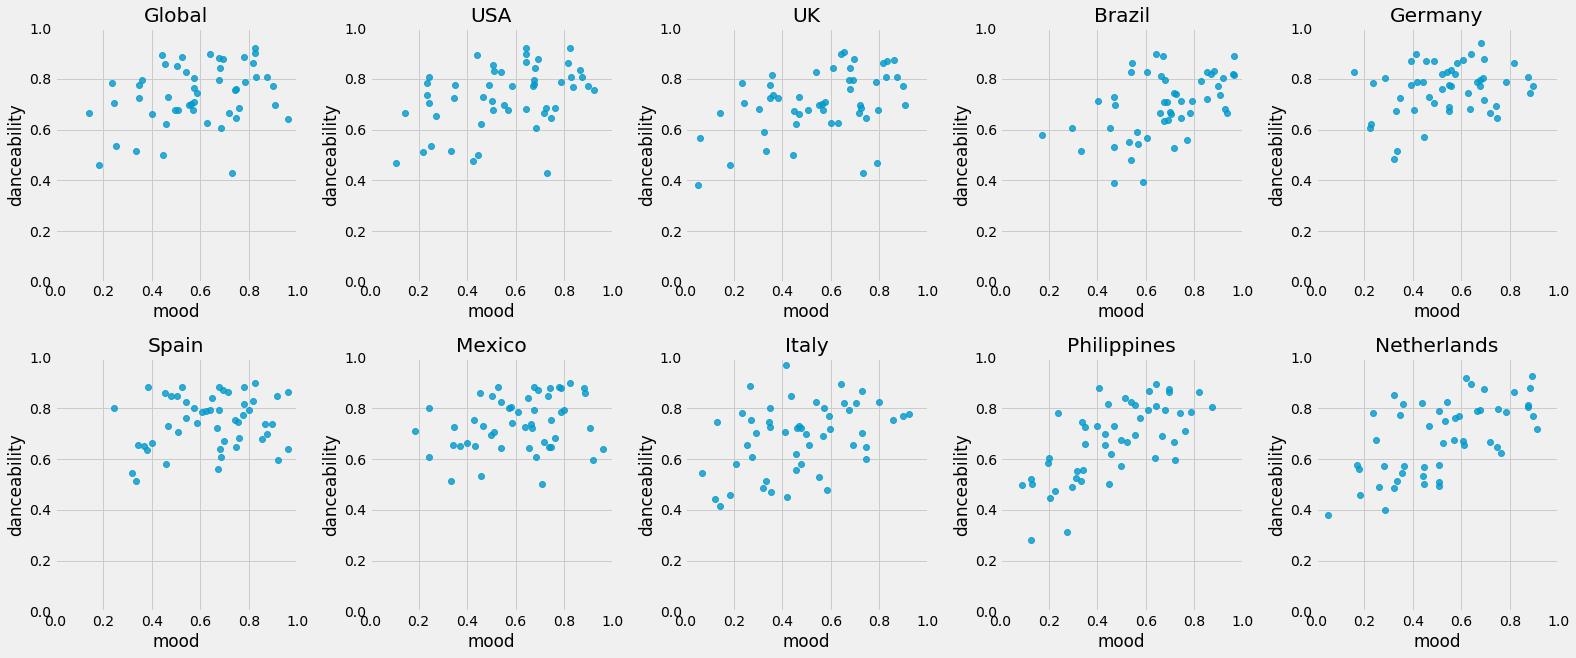

In [46]:
# Scatter graphs for mood vs. danceability for all countries 
plt.figure(figsize=(24,10))
plt.subplot(2,5,1)
sns.regplot(x='mood', y='danceability', data=globalx, fit_reg=False, color='#0099cc')
plt.title('Global')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,2)
sns.regplot(x='mood', y='danceability', data=usa, fit_reg=False, color='#0099cc')
plt.title('USA')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,3)
sns.regplot(x='mood', y='danceability', data=uk, fit_reg=False, color='#0099cc')
plt.title('UK')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,4)
sns.regplot(x='mood', y='danceability', data=brazil, fit_reg=False, color='#0099cc')
plt.title('Brazil')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,5)
sns.regplot(x='mood', y='danceability', data=germany, fit_reg=False, color='#0099cc')
plt.title('Germany')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,6)
sns.regplot(x='mood', y='danceability', data=spain, fit_reg=False, color='#0099cc')
plt.title('Spain')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,7)
sns.regplot(x='mood', y='danceability', data=mexico, fit_reg=False, color='#0099cc')
plt.title('Mexico')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,8)
sns.regplot(x='mood', y='danceability', data=italy, fit_reg=False, color='#0099cc')
plt.title('Italy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,9)
sns.regplot(x='mood', y='danceability', data=philippines, fit_reg=False, color='#0099cc')
plt.title('Philippines')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,10)
sns.regplot(x='mood', y='danceability', data=netherlands, fit_reg=False, color='#0099cc')
plt.title('Netherlands')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.subplots_adjust(hspace=0.3, wspace=0.3)

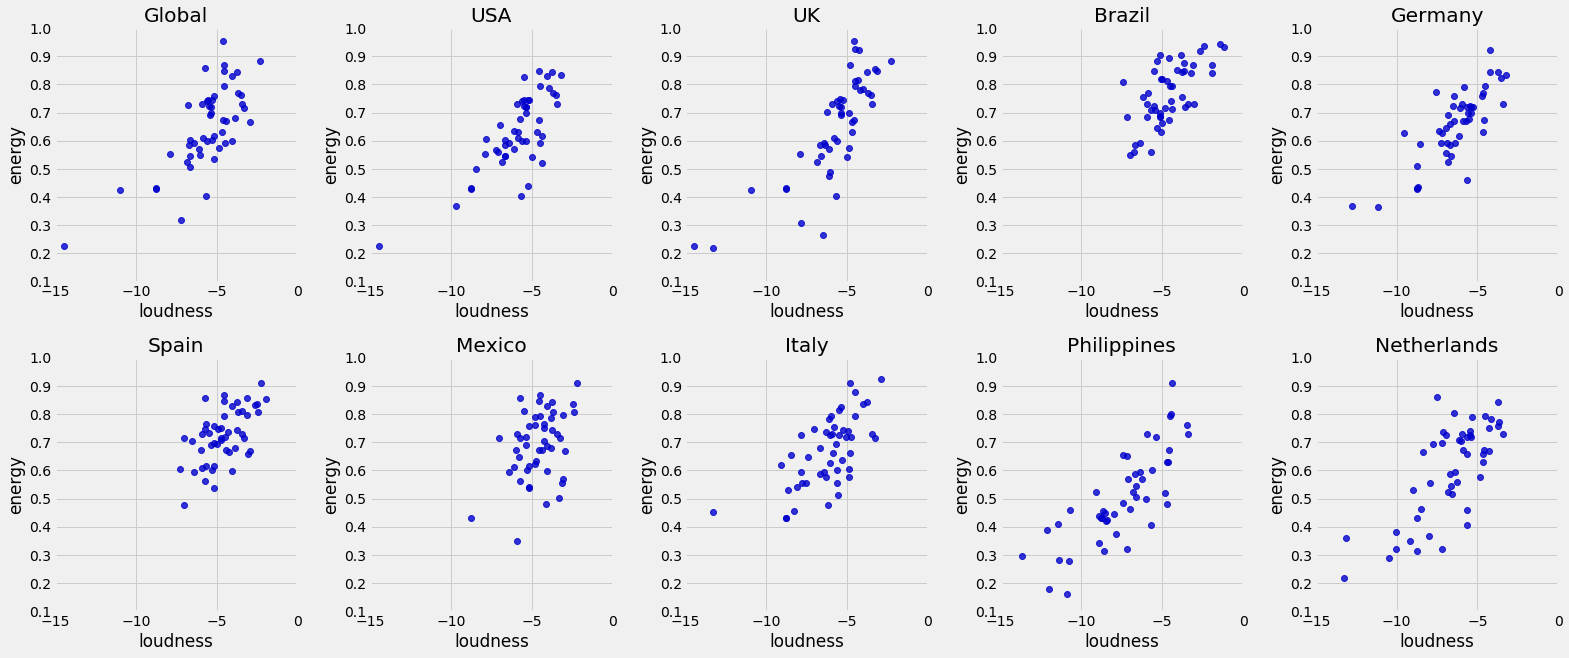

In [47]:
# Scatter graphs for energy vs. loudness for all countries 
plt.figure(figsize=(24,10))
plt.subplot(2,5,1)
sns.regplot(x='loudness', y='energy', data=globalx, fit_reg=False, color='#0000cc')
plt.title('Global')
plt.xlim([-15.0, 0.0])
plt.ylim([0.1, 1.0])
plt.subplot(2,5,2)
sns.regplot(x='loudness', y='energy', data=usa, fit_reg=False, color='#0000cc')
plt.title('USA')
plt.xlim([-15.0, 0.0])
plt.ylim([0.1, 1.0])
plt.subplot(2,5,3)
sns.regplot(x='loudness', y='energy', data=uk, fit_reg=False, color='#0000cc')
plt.title('UK')
plt.xlim([-15.0, 0.0])
plt.ylim([0.1, 1.0])
plt.subplot(2,5,4)
sns.regplot(x='loudness', y='energy', data=brazil, fit_reg=False, color='#0000cc')
plt.title('Brazil')
plt.xlim([-15.0, 0.0])
plt.ylim([0.1, 1.0])
plt.subplot(2,5,5)
sns.regplot(x='loudness', y='energy', data=germany, fit_reg=False, color='#0000cc')
plt.title('Germany')
plt.xlim([-15.0, 0.0])
plt.ylim([0.1, 1.0])
plt.subplot(2,5,6)
sns.regplot(x='loudness', y='energy', data=spain, fit_reg=False, color='#0000cc')
plt.title('Spain')
plt.xlim([-15.0, 0.0])
plt.ylim([0.1, 1.0])
plt.subplot(2,5,7)
sns.regplot(x='loudness', y='energy', data=mexico, fit_reg=False, color='#0000cc')
plt.title('Mexico')
plt.xlim([-15.0, 0.0])
plt.ylim([0.1, 1.0])
plt.subplot(2,5,8)
sns.regplot(x='loudness', y='energy', data=italy, fit_reg=False, color='#0000cc')
plt.title('Italy')
plt.xlim([-15.0, 0.0])
plt.ylim([0.1, 1.0])
plt.subplot(2,5,9)
sns.regplot(x='loudness', y='energy', data=philippines, fit_reg=False, color='#0000cc')
plt.title('Philippines')
plt.xlim([-15.0, 0.0])
plt.ylim([0.1, 1.0])
plt.subplot(2,5,10)
sns.regplot(x='loudness', y='energy', data=netherlands, fit_reg=False, color='#0000cc')
plt.title('Netherlands')
plt.xlim([-15.0, 0.0])
plt.ylim([0.1, 1.0])
plt.subplots_adjust(hspace=0.3, wspace=0.3)

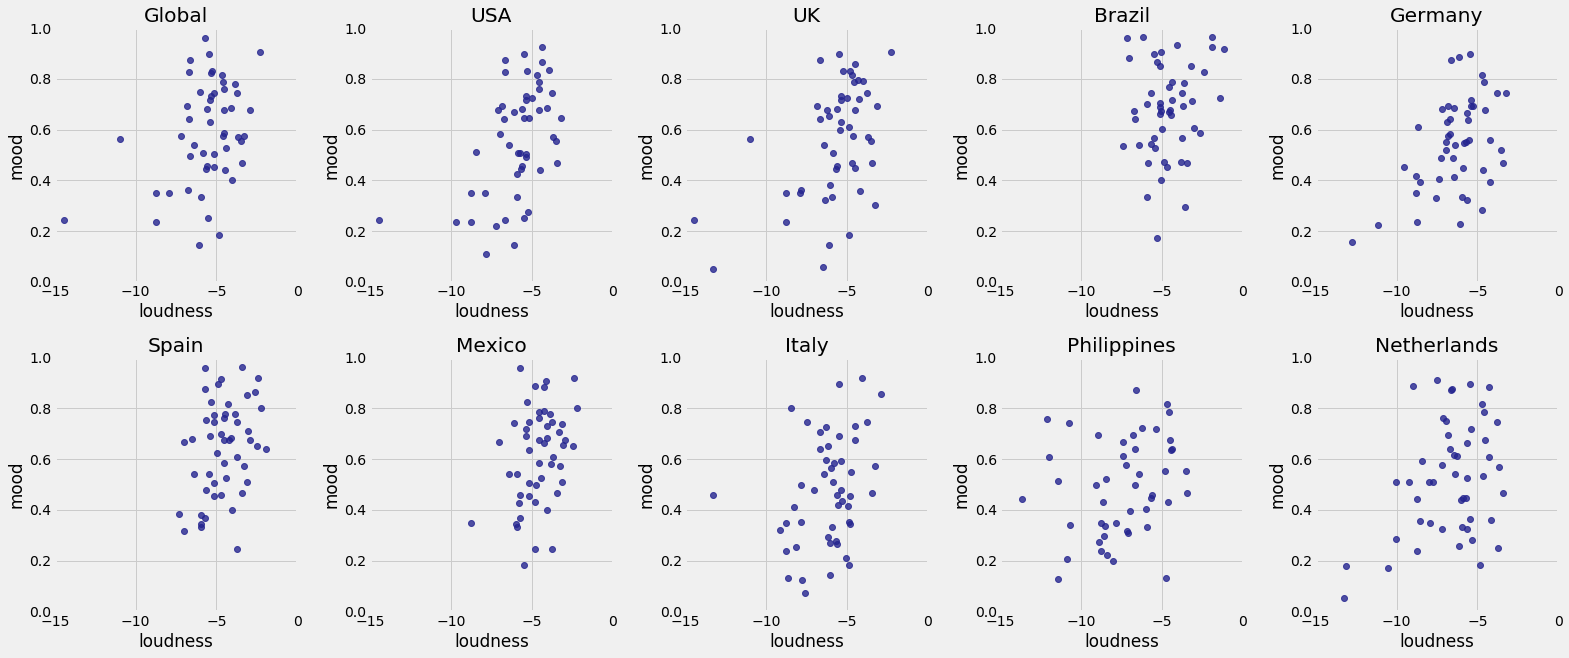

In [48]:
# Scatter graphs for mood vs. loudness for all countries 
plt.figure(figsize=(24,10))
plt.subplot(2,5,1)
sns.regplot(x='loudness', y='mood', data=globalx, fit_reg=False, color='#24248f')
plt.title('Global')
plt.xlim([-15.0, 0.0])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,2)
sns.regplot(x='loudness', y='mood', data=usa, fit_reg=False, color='#24248f')
plt.title('USA')
plt.xlim([-15.0, 0.0])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,3)
sns.regplot(x='loudness', y='mood', data=uk, fit_reg=False, color='#24248f')
plt.title('UK')
plt.xlim([-15.0, 0.0])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,4)
sns.regplot(x='loudness', y='mood', data=brazil, fit_reg=False, color='#24248f')
plt.title('Brazil')
plt.xlim([-15.0, 0.0])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,5)
sns.regplot(x='loudness', y='mood', data=germany, fit_reg=False, color='#24248f')
plt.title('Germany')
plt.xlim([-15.0, 0.0])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,6)
sns.regplot(x='loudness', y='mood', data=spain, fit_reg=False, color='#24248f')
plt.title('Spain')
plt.xlim([-15.0, 0.0])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,7)
sns.regplot(x='loudness', y='mood', data=mexico, fit_reg=False, color='#24248f')
plt.title('Mexico')
plt.xlim([-15.0, 0.0])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,8)
sns.regplot(x='loudness', y='mood', data=italy, fit_reg=False, color='#24248f')
plt.title('Italy')
plt.xlim([-15.0, 0.0])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,9)
sns.regplot(x='loudness', y='mood', data=philippines, fit_reg=False, color='#24248f')
plt.title('Philippines')
plt.xlim([-15.0, 0.0])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,10)
sns.regplot(x='loudness', y='mood', data=netherlands, fit_reg=False, color='#24248f')
plt.title('Netherlands')
plt.xlim([-15.0, 0.0])
plt.ylim([0.0, 1.0])
plt.subplots_adjust(hspace=0.3, wspace=0.3)

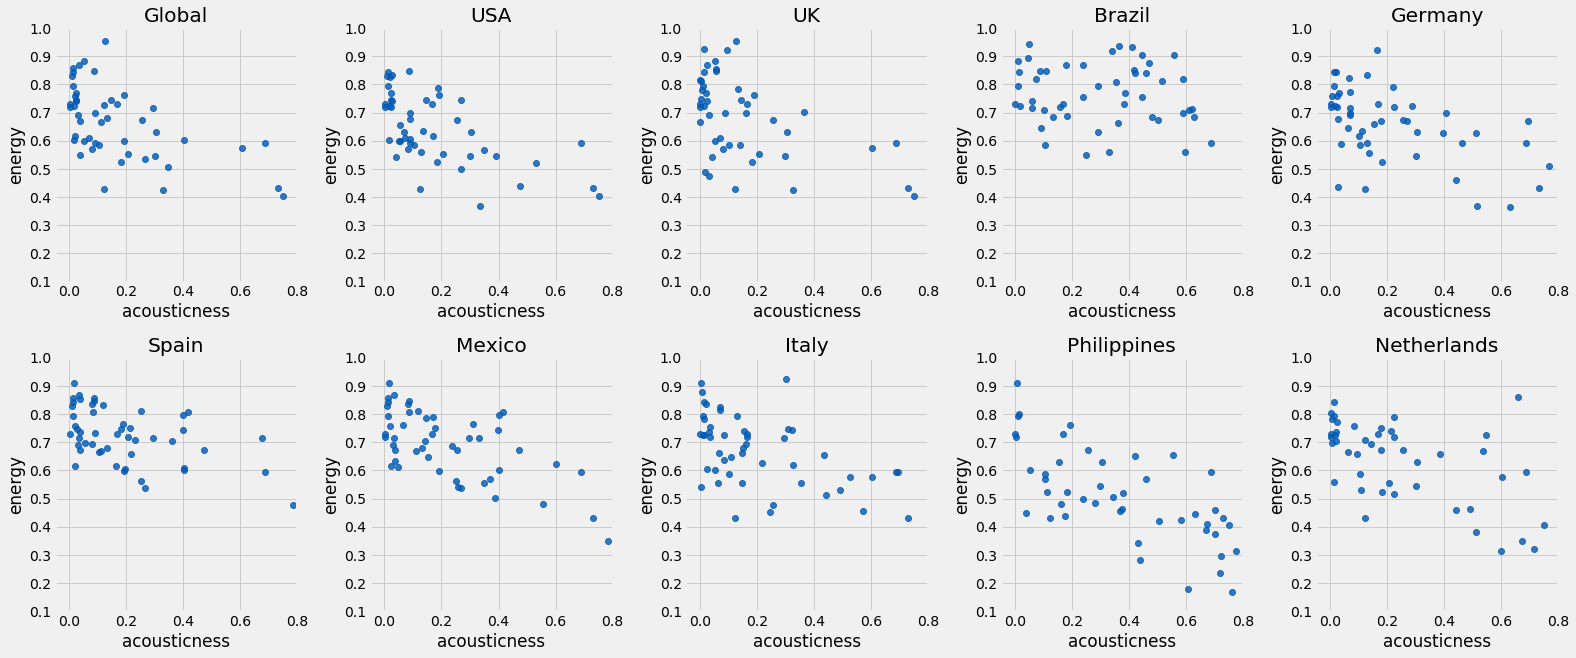

In [49]:
# Scatter graphs for acousticness vs. energy for all countries 
plt.figure(figsize=(24,10))
plt.subplot(2,5,1)
sns.regplot(x='acousticness', y='energy', data=globalx, fit_reg=False, color='#0059b3')
plt.title('Global')
plt.xlim([-0.05, 0.8])
plt.ylim([0.1, 1.0])
plt.subplot(2,5,2)
sns.regplot(x='acousticness', y='energy', data=usa, fit_reg=False, color='#0059b3')
plt.title('USA')
plt.xlim([-0.05, 0.8])
plt.ylim([0.1, 1.0])
plt.subplot(2,5,3)
sns.regplot(x='acousticness', y='energy', data=uk, fit_reg=False, color='#0059b3')
plt.title('UK')
plt.xlim([-0.05, 0.8])
plt.ylim([0.1, 1.0])
plt.subplot(2,5,4)
sns.regplot(x='acousticness', y='energy', data=brazil, fit_reg=False, color='#0059b3')
plt.title('Brazil')
plt.xlim([-0.05, 0.8])
plt.ylim([0.1, 1.0])
plt.subplot(2,5,5)
sns.regplot(x='acousticness', y='energy', data=germany, fit_reg=False, color='#0059b3')
plt.title('Germany')
plt.xlim([-0.05, 0.8])
plt.ylim([0.1, 1.0])
plt.subplot(2,5,6)
sns.regplot(x='acousticness', y='energy', data=spain, fit_reg=False, color='#0059b3')
plt.title('Spain')
plt.xlim([-0.05, 0.8])
plt.ylim([0.1, 1.0])
plt.subplot(2,5,7)
sns.regplot(x='acousticness', y='energy', data=mexico, fit_reg=False, color='#0059b3')
plt.title('Mexico')
plt.xlim([-0.05, 0.8])
plt.ylim([0.1, 1.0])
plt.subplot(2,5,8)
sns.regplot(x='acousticness', y='energy', data=italy, fit_reg=False, color='#0059b3')
plt.title('Italy')
plt.xlim([-0.05, 0.8])
plt.ylim([0.1, 1.0])
plt.subplot(2,5,9)
sns.regplot(x='acousticness', y='energy', data=philippines, fit_reg=False, color='#0059b3')
plt.title('Philippines')
plt.xlim([-0.05, 0.8])
plt.ylim([0.1, 1.0])
plt.subplot(2,5,10)
sns.regplot(x='acousticness', y='energy', data=netherlands, fit_reg=False, color='#0059b3')
plt.title('Netherlands')
plt.xlim([-0.05, 0.8])
plt.ylim([0.1, 1.0])
plt.subplots_adjust(hspace=0.3, wspace=0.3)

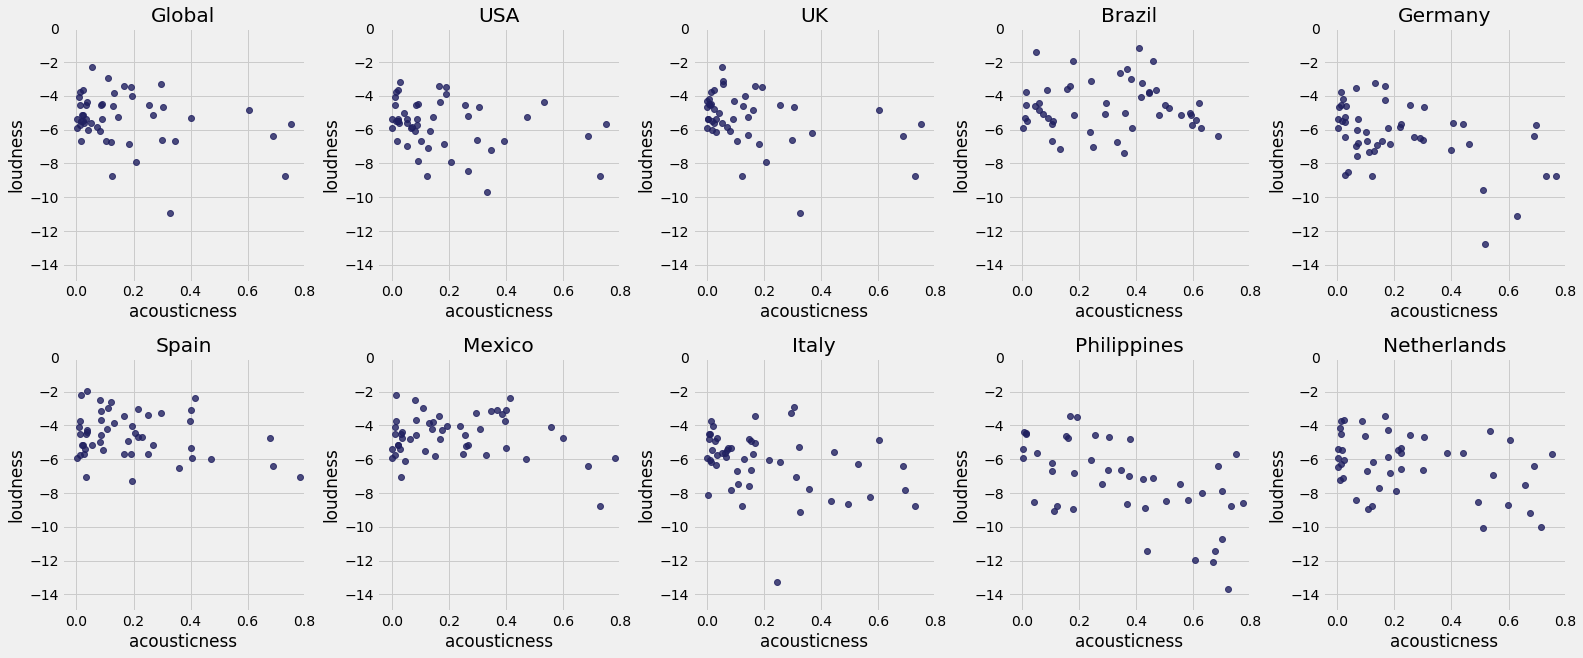

In [50]:
# Scatter graphs for acousticness vs. loudness for all countries 
plt.figure(figsize=(24,10))
plt.subplot(2,5,1)
sns.regplot(x='acousticness', y='loudness', data=globalx, fit_reg=False, color='#202060')
plt.title('Global')
plt.ylim([-15.0, 0.0])
plt.xlim([-0.05, 0.8])
plt.subplot(2,5,2)
sns.regplot(x='acousticness', y='loudness', data=usa, fit_reg=False, color='#202060')
plt.title('USA')
plt.xlim([-0.05, 0.8])
plt.ylim([-15.0, 0.0])
plt.subplot(2,5,3)
sns.regplot(x='acousticness', y='loudness', data=uk, fit_reg=False, color='#202060')
plt.title('UK')
plt.xlim([-0.05, 0.8])
plt.ylim([-15.0, 0.0])
plt.subplot(2,5,4)
sns.regplot(x='acousticness', y='loudness', data=brazil, fit_reg=False, color='#202060')
plt.title('Brazil')
plt.xlim([-0.05, 0.8])
plt.ylim([-15.0, 0.0])
plt.subplot(2,5,5)
sns.regplot(x='acousticness', y='loudness', data=germany, fit_reg=False, color='#202060')
plt.title('Germany')
plt.xlim([-0.05, 0.8])
plt.ylim([-15.0, 0.0])
plt.subplot(2,5,6)
sns.regplot(x='acousticness', y='loudness', data=spain, fit_reg=False, color='#202060')
plt.title('Spain')
plt.xlim([-0.05, 0.8])
plt.ylim([-15.0, 0.0])
plt.subplot(2,5,7)
sns.regplot(x='acousticness', y='loudness', data=mexico, fit_reg=False, color='#202060')
plt.title('Mexico')
plt.xlim([-0.05, 0.8])
plt.ylim([-15.0, 0.0])
plt.subplot(2,5,8)
sns.regplot(x='acousticness', y='loudness', data=italy, fit_reg=False, color='#202060')
plt.title('Italy')
plt.xlim([-0.05, 0.8])
plt.ylim([-15.0, 0.0])
plt.subplot(2,5,9)
sns.regplot(x='acousticness', y='loudness', data=philippines, fit_reg=False, color='#202060')
plt.title('Philippines')
plt.xlim([-0.05, 0.8])
plt.ylim([-15.0, 0.0])
plt.subplot(2,5,10)
sns.regplot(x='acousticness', y='loudness', data=netherlands, fit_reg=False, color='#202060')
plt.title('Netherlands')
plt.xlim([-0.05, 0.8])
plt.ylim([-15.0, 0.0])
plt.subplots_adjust(hspace=0.3, wspace=0.3)

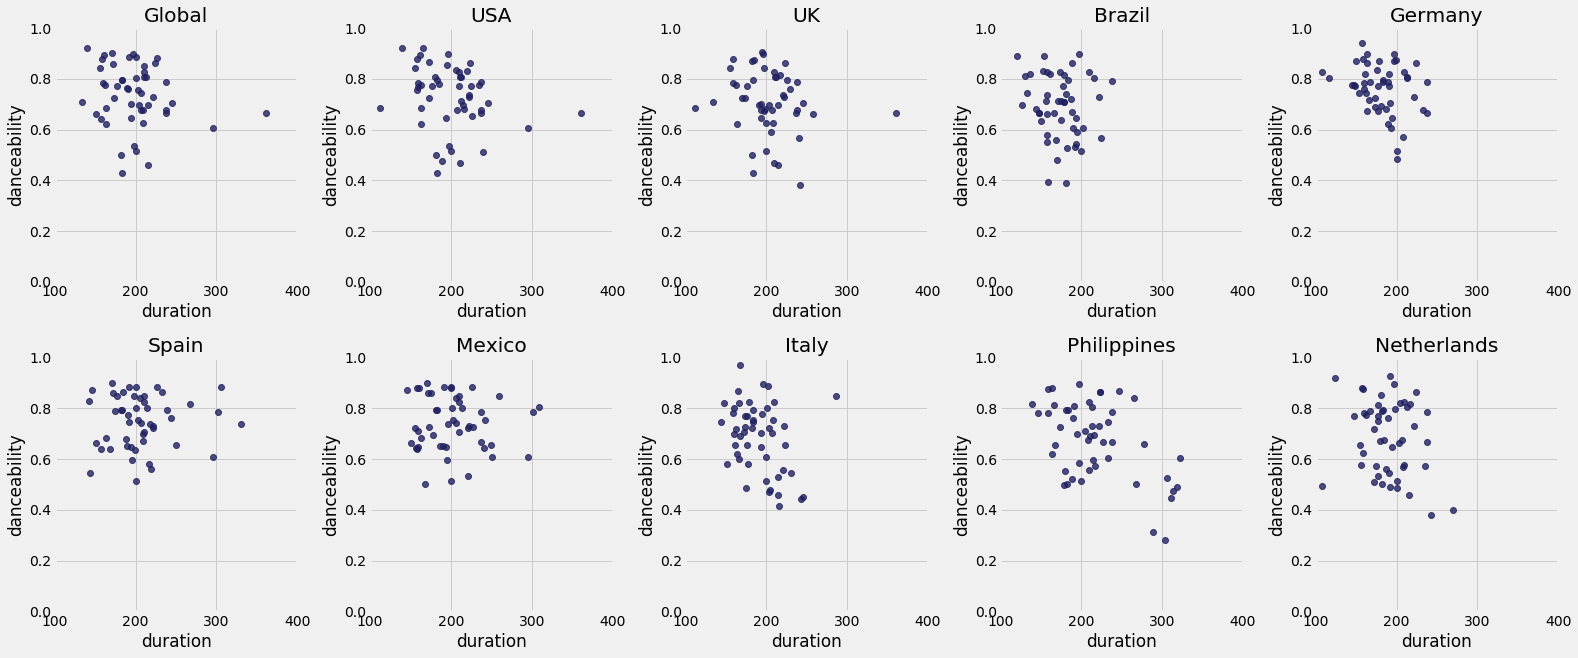

In [51]:
# Scatter graphs for duration vs. danceability for all countries 
plt.figure(figsize=(24,10))
plt.subplot(2,5,1)
sns.regplot(x='duration', y='danceability', data=globalx, fit_reg=False, color='#202060')
plt.title('Global')
plt.xlim([100, 400])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,2)
sns.regplot(x='duration', y='danceability', data=usa, fit_reg=False, color='#202060')
plt.title('USA')
plt.xlim([100, 400])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,3)
sns.regplot(x='duration', y='danceability', data=uk, fit_reg=False, color='#202060')
plt.title('UK')
plt.xlim([100, 400])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,4)
sns.regplot(x='duration', y='danceability', data=brazil, fit_reg=False, color='#202060')
plt.title('Brazil')
plt.xlim([100, 400])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,5)
sns.regplot(x='duration', y='danceability', data=germany, fit_reg=False, color='#202060')
plt.title('Germany')
plt.xlim([100, 400])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,6)
sns.regplot(x='duration', y='danceability', data=spain, fit_reg=False, color='#202060')
plt.title('Spain')
plt.xlim([100, 400])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,7)
sns.regplot(x='duration', y='danceability', data=mexico, fit_reg=False, color='#202060')
plt.title('Mexico')
plt.xlim([100, 400])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,8)
sns.regplot(x='duration', y='danceability', data=italy, fit_reg=False, color='#202060')
plt.title('Italy')
plt.xlim([100, 400])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,9)
sns.regplot(x='duration', y='danceability', data=philippines, fit_reg=False, color='#202060')
plt.title('Philippines')
plt.xlim([100, 400])
plt.ylim([0.0, 1.0])
plt.subplot(2,5,10)
sns.regplot(x='duration', y='danceability', data=netherlands, fit_reg=False, color='#202060')
plt.title('Netherlands')
plt.xlim([100, 400])
plt.ylim([0.0, 1.0])
plt.subplots_adjust(hspace=0.3, wspace=0.3)

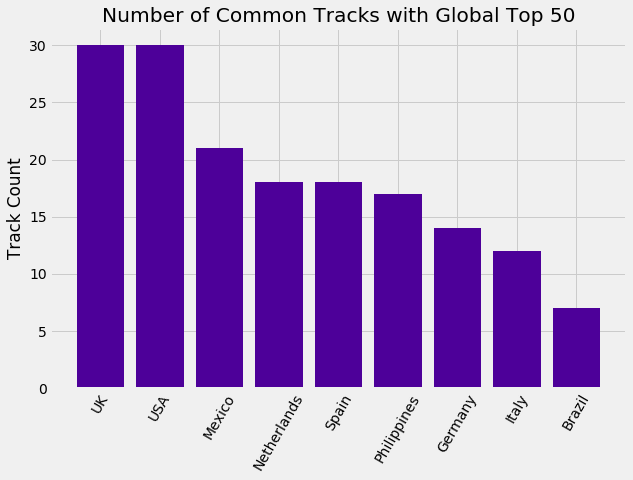

In [52]:
# Count of how many tracks each country has in common with the global top 50 
countries = [usa, uk, brazil, germany, spain, mexico, italy, philippines, netherlands]

def global_comparison(country):
    songs = set(country.song_title).intersection(globalx.song_title)
    return len(songs)

usa_tracks = global_comparison(usa)
uk_tracks = global_comparison(uk)
brazil_tracks = global_comparison(brazil)
germany_tracks = global_comparison(germany)
spain_tracks = global_comparison(spain)
mexico_tracks = global_comparison(mexico)
italy_tracks = global_comparison(italy)
philippines_tracks = global_comparison(philippines)
netherlands_tracks = global_comparison(netherlands)

countries = ['UK', 'USA', 'Mexico', 'Netherlands', 'Spain', 'Philippines', 'Germany', 'Italy', 'Brazil']
lengths = [uk_tracks, usa_tracks, mexico_tracks, netherlands_tracks, spain_tracks, philippines_tracks, 
           germany_tracks, italy_tracks, brazil_tracks]

fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(countries, lengths, color='#4d0099')
plt.xticks(rotation=60)
plt.ylabel('Track Count')
plt.title('Number of Common Tracks with Global Top 50')
plt.show()

In [53]:
# Compare most popular songs/artists globally
def global_comparison_songs(country):
    songs = set(country.song_title).intersection(globalx.song_title)
    return songs

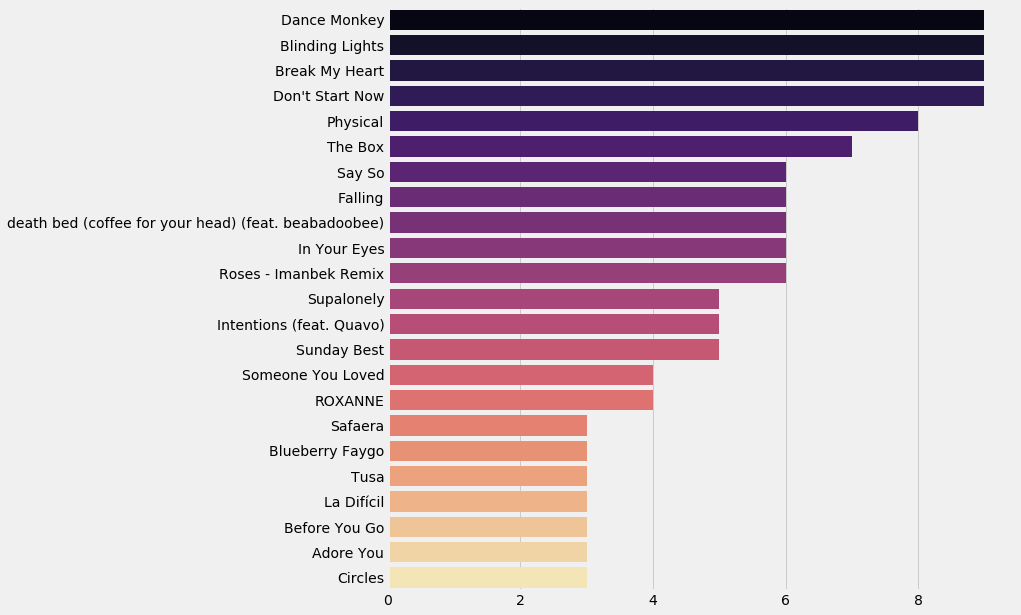

In [71]:
# Count of how many of the country playlists the most popular songs appear in 
usa_songs = global_comparison_songs(usa)
uk_songs = global_comparison_songs(uk)
brazil_songs = global_comparison_songs(brazil)
germany_songs = global_comparison_songs(germany)
spain_songs = global_comparison_songs(spain)
mexico_songs = global_comparison_songs(mexico)
italy_songs = global_comparison_songs(italy)
philippines_songs = global_comparison_songs(philippines)
netherlands_songs = global_comparison_songs(netherlands)

songs = [list(usa_songs)+list(uk_songs)+list(brazil_songs)+list(germany_songs)+list(spain_songs)+
         list(mexico_songs)+list(italy_songs)+list(philippines_songs)+list(netherlands_songs)]

songs = pd.Series(songs[0])

plt.figure(figsize=(10,10))
sns.barplot(x=songs.value_counts()[0:23], y=songs.value_counts().index[0:23], orient='h', palette='magma')

In [55]:
def get_artist_list(country):
    artists = []
    for item in country['artist/s']: 
        item = item.strip('[^\w]')
        item = item.split(',')
        if len(item) > 1: 
            for value in item: 
                artists.append(value)
        else: 
            artists.append(item)
            
    artists = [str(value) for value in artists]
    artists = [value.strip('[^\w]') for value in artists]
    artists = [value.strip() for value in artists]
    
    return pd.Series(artists)

In [56]:
# Get artist lists
global_artists = get_artist_list(globalx)
usa_artists = get_artist_list(usa)
uk_artists = get_artist_list(uk)
brazil_artists = get_artist_list(brazil)
germany_artists = get_artist_list(germany)
spain_artists = get_artist_list(spain)
mexico_artists = get_artist_list(mexico)
italy_artists = get_artist_list(italy)
philippines_artists = get_artist_list(philippines)
netherlands_artists = get_artist_list(netherlands)

Text(0.5, 1.0, 'Netherlands')

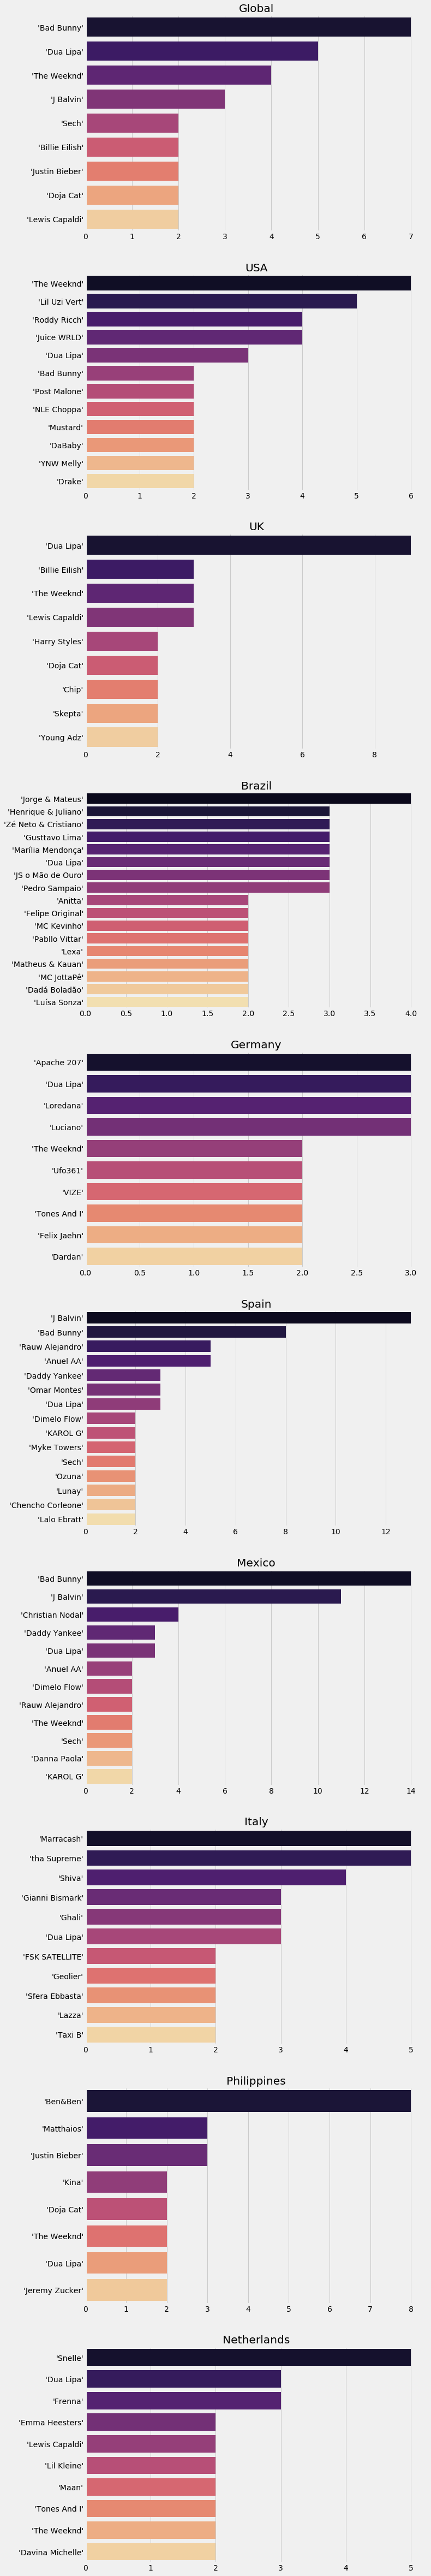

In [57]:
# Graphs to show the artists with more than one song in the top 50 per country 
plt.figure(figsize=(10,80))
plt.subplot(10,1,1)
sns.barplot(x=global_artists.value_counts()[:9], y=global_artists.value_counts().index[:9], 
            orient='h', palette='magma')
plt.title('Global')
plt.subplot(10,1,2)
sns.barplot(x=usa_artists.value_counts()[:12], y=usa_artists.value_counts().index[:12], 
            orient='h', palette='magma')
plt.title('USA')
plt.subplot(10,1,3)
sns.barplot(x=uk_artists.value_counts()[:9], y=uk_artists.value_counts().index[:9], 
            orient='h', palette='magma')
plt.title('UK')
plt.subplot(10,1,4)
sns.barplot(x=brazil_artists.value_counts()[:17], y=brazil_artists.value_counts().index[:17], 
            orient='h', palette='magma')
plt.title('Brazil')
plt.subplot(10,1,5)
sns.barplot(x=germany_artists.value_counts()[:10], y=germany_artists.value_counts().index[:10], 
            orient='h', palette='magma')
plt.title('Germany')
plt.subplot(10,1,6)
sns.barplot(x=spain_artists.value_counts()[:15], y=spain_artists.value_counts().index[:15], 
            orient='h', palette='magma')
plt.title('Spain')
plt.subplot(10,1,7)
sns.barplot(x=mexico_artists.value_counts()[:12], y=mexico_artists.value_counts().index[:12], 
            orient='h', palette='magma')
plt.title('Mexico')
plt.subplot(10,1,8)
sns.barplot(x=italy_artists.value_counts()[:11], y=italy_artists.value_counts().index[:11], 
            orient='h', palette='magma')
plt.title('Italy')
plt.subplot(10,1,9)
sns.barplot(x=philippines_artists.value_counts()[:8], y=philippines_artists.value_counts().index[:8], 
            orient='h', palette='magma')
plt.title('Philippines')
plt.subplot(10,1,10)
sns.barplot(x=netherlands_artists.value_counts()[:10], y=netherlands_artists.value_counts().index[:10], 
            orient='h', palette='magma')
plt.title('Netherlands')

In [58]:
def global_comparison_artists(artist_list):
    arteests = set(artist_list).intersection(global_artists)
    return arteests

In [59]:
# Creating a list of the the unique values for artists that appear in the global playlist and other countries 
usa_comp = global_comparison_artists(usa_artists)
uk_comp = global_comparison_artists(uk_artists)
brazil_comp = global_comparison_artists(brazil_artists)
germany_comp = global_comparison_artists(germany_artists)
spain_comp = global_comparison_artists(spain_artists)
mexico_comp = global_comparison_artists(mexico_artists)
italy_comp = global_comparison_artists(italy_artists)
philippines_comp = global_comparison_artists(philippines_artists)
netherlands_comp = global_comparison_artists(netherlands_artists)

global_arteests = [list(usa_comp)+list(uk_comp)+list(brazil_comp)+list(germany_comp)+list(spain_comp)+
                   list(mexico_comp)+list(italy_comp)+list(philippines_comp)+list(netherlands_comp)]

global_arteests = pd.Series(global_arteests[0])

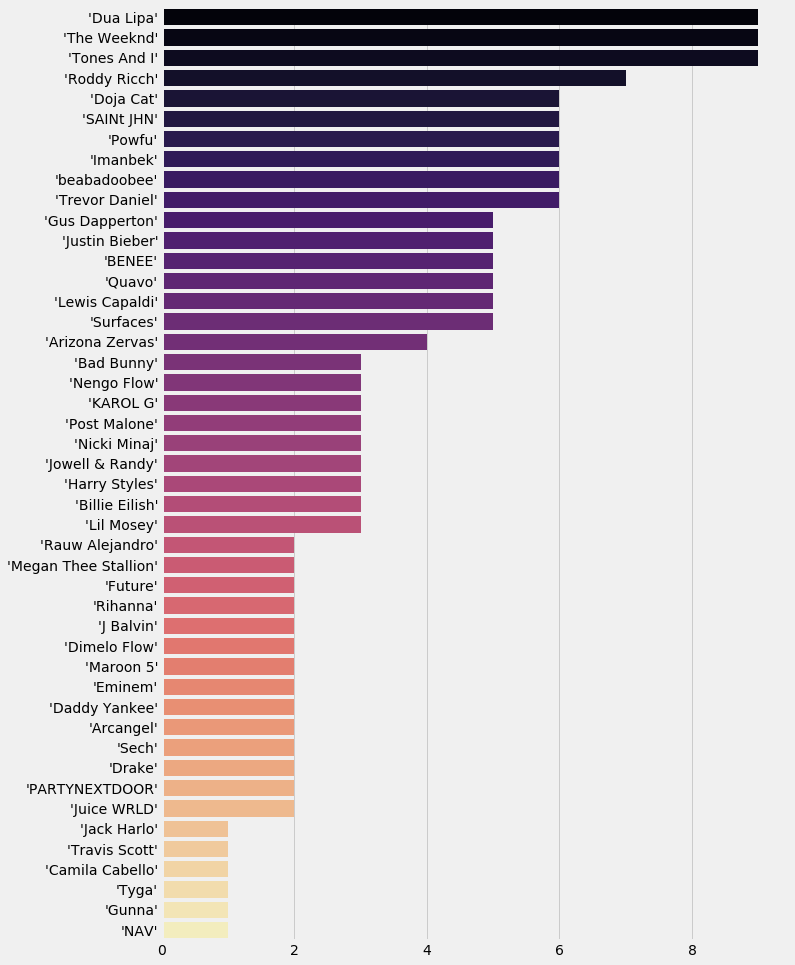

In [60]:
# Count plot for how many of the top nine countries the artist appears in 
plt.figure(figsize=(10,16))
sns.barplot(x=global_arteests.value_counts(), y=global_arteests.value_counts().index, 
            orient='h', palette='magma')

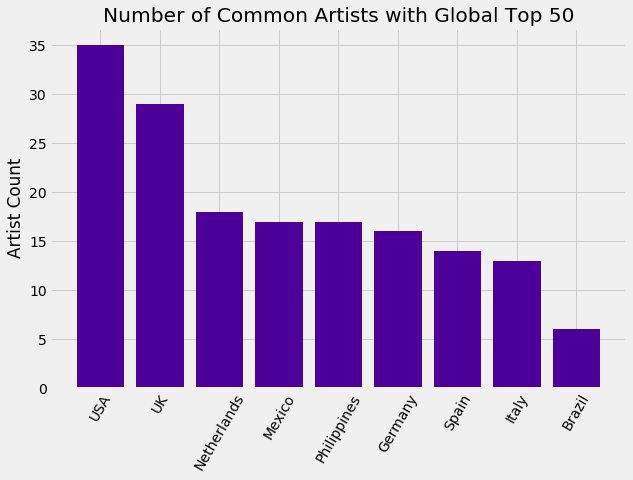

In [61]:
# Count plot for number of artist in common with the Global top 50
common_arteests = [len(usa_comp), len(uk_comp), len(netherlands_comp), len(mexico_comp), len(philippines_comp),
                   len(germany_comp), len(spain_comp), len(italy_comp), len(brazil_comp)]
c0untries = ['USA', 'UK', 'Netherlands', 'Mexico', 'Philippines', 'Germany', 'Spain', 'Italy', 'Brazil']
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(c0untries, common_arteests, color='#4d0099')
plt.xticks(rotation=60)
plt.ylabel('Artist Count')
plt.title('Number of Common Artists with Global Top 50')
plt.show()

## Conclusions: 

Duration observations: 
* Brazil and Germany tend to have the shortest track lengths and Philippines the longest. 

Danceability observations: 
* Philippines has the lowest levels of danceability and Germany tends to have the highest
* Mexico, Spain and Germany have the shortest ranges and tend to have more danceable tracks 

Energy observations: 
* The UK tends to have the lowest energy track but also has the greatest range. 
* Brazil has the highest energy tracks as well as Spain

Loudness observations:
* The range for all countries is shorter than the typical -60 to 0 range and Brazil tends to have the loudest tracks as well as Spain and Mexico.
* The Philippines has the greatest range 

Mode observations: 
* The Philippines has the clearest distinction between number of Major and Minor songs and more are Major. 
* Brazil is similar and most of the songs are Major.
* Germany and the USA are the only two countries with more Minor songs and the USA has a couple more minor songs than Germany

Speechiness	observations: 
* Philippines and the Netherlands have very low speechiness values.
* It is likely that Germany and the USA have more rap tracks with higher speechiness values and Italy has the track with the highest speechiness value

Acousticness observations: 
* The Philippines has the highest range of acousticness values. 
* Brazil also has a high mean for acousticness. 
* Spain has the shortest range of acousticness values but has a mean higher than that of the UK and USA.

Instrumentalness observations: 
* All tracks for all countries have 0 values for instrumentalness meaning that all tracks for all charts are very vocal. 
* There is one outlier (probably the same track) for the UK, USA and Global which is very high.
* Germany has the biggest range and Italy and Brazil have the shortest ranges.

Liveness observations: 
* Brazil by far has the highest liveness values. 

Mood observations: 
* Philippines and Italy are the only two with means below 0.5 indicating a stronger tendency towards “sad, angry and depressed” tracks.
* Brazil has the highest mean indicating more upbeat and happy songs. 
* Spain has the shortest range, tending towards more upbeat tracks. 

Tempo observations: 
* The UK has the shortest range. 
* All the mean tempos are within 100 and 140 bpm. 
* Brazil has the biggest range whereas Mexico and Spain both have wider ranges but with most of the tracks below 120 bpm (skewed distribution).

Popularity observations: 
* Global and the US obviously have the most popular tracks, Mexico also has very popular tracks. 
* Italy has the least popular, closely followed by Brazil but Germany also has the biggest range and the least popular track in there. 

The USA and the UK are the most similar charts to the Global charts and Brazil and Italy are the least similar. Brazil has a lot of artists who have more than one track in the Brazilian top 50 but don't appear in any other charts. Only English language artists appear in more than 3 different countries charts. Bad Bunny is the most popular artist both in the global charts and in Mexico. Although Dua Lipa and The Weekend have more success across the globe. 